
# "Machine Learning-Driven Demand Forecasting and Supply Optimization for Instant Noodles Distribution"

### Probelm Statement
The FMCG company has encountered a critical issue in its instant noodles business: a mismatch between supply and demand across different regions. In high-demand areas, supply is insufficient, leading to stockouts, while in low-demand regions, there is an oversupply, resulting in increased inventory costs and waste. This imbalance causes financial losses and operational inefficiencies, necessitating a solution to optimize supply quantities across all warehouses.



### Goal & Objective:
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.

### Meta Data
##### Ware_house_ID : Unique Warehouse id where product is prepared for dispatch
##### WH_Manager_ID : Manager Id present in the warehouse
##### zone : Zone of the Warehouse
##### WH_regional_zone : Regional Zone of the warehouse
##### num_refill_req_l3m : Refilling request received by the warehouse in the last 3 months
##### transport_issue_l1y : No. of transport issued for warehouse in last 1 year
##### Competitor_in_mkt : No. of competitors in the market
##### retail_shop_num : Number of retail shops who sell noodlesproduced by the warehouse
##### wh_owner_type : The warehouse is owned by the company or it is on rent
##### distributor_num : No. of distributor who works between warehouse and retail shops
##### flood_impacted : Is the warehouse in a flood impacted area or not
##### flood_proof : Warehouse is having flood proof indicator
##### electric_supply : Does the warehouse have proper electric supply along with some power backup
##### dist_from_hub : distance from the warehouse to production hub
##### workers_num : no. workers in the warehouse
##### wh_est_year : warehouse establishment year
##### storage_issue_reported_l3m : storage issues reported by the warehouse in the last 3 months
##### govt_check_l3m : Government checking in last 3 months
##### temp_reg_mach : warehouse having temperature regulating machine indicator or not
##### approved_wh_govt_certificate : Type of approval warehouse having been issued by government
##### wh_breakdown_l3m : Number of times the warehouse faces thebreakdown in the last 3 months
##### product_wg_ton : Product weight

### Import Necessary  Libraries

### Imports:
- pandas as pd: Used for data manipulation and analysis.
- numpy as np: Provides support for arrays and mathematical functions.
- seaborn as sns: A statistical data visualization library based on Matplotlib.
- matplotlib.pylab as plt: Used for creating static, animated, and interactive visualizations.
- pd.options.display.max_columns = 999, This line sets the maximum number of columns to display in a DataFrame to 999, ensuring that all columns will be visible when DataFrames are printed. This is particularly useful when working with wide datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

pd.options.display.max_columns = 999

### Matplotlib Configuration
- The line of code plt.rcParams['figure.figsize'] = (7, 6) is used to set the default size of the figures created using Matplotlib.
### Figure Size
- The dimensions specified are 7 inches in width and 6 inches in height. This means that any plots or figures generated after this configuration will have these dimensions unless overridden in individual plotting functions.

In [2]:
plt.rcParams['figure.figsize']=(7,6)

### Warnings Module:
- The line import warnings imports the warnings module, which is used to manage warnings in Python.
### Filtering Warnings:
- The command warnings.filterwarnings('ignore') is used to suppress or ignore all warning messages that might be generated during the execution of your code.
- This means that any warnings (e.g., DeprecationWarnings, UserWarnings) will not be displayed in the output.

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load Datasets

### Pandas Library:

- The line import pandas as pd indicates that the Pandas library has already been imported, enabling data manipulation and analysis using its functions.
### Reading CSV File:

- The command data = pd.read_csv('FMCG_data.csv') is used to read a CSV (Comma-Separated Values) file named FMCG_data.csv into a Pandas DataFrame.
- This DataFrame, assigned to the variable data, will allow for easy access and manipulation of the data contained within the CSV file.

In [4]:
data = pd.read_csv('FMCG_data.csv')

### Pandas DataFrame:

- The line data.head() is a method call on a Pandas DataFrame (in this case, the DataFrame is stored in the variable data).
### Displaying Initial Rows:

- The head() function by default returns the first 5 rows of the DataFrame.
- This allows quickly to inspect the contents of the DataFrame for an overview of the data structure.

In [5]:
# display first 5 rows from train data
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


### Dataset Dimensions:

- The output (25000, 24) indicates that the DataFrame named data contains:
- 25,000 rows: This represents the number of individual data entries or observations in the dataset.
- 24 columns: This represents the number of features or attributes associated with each observation.

In [6]:
data.shape

(25000, 24)

### Purpose of the Code:

- The line of code col = data.columns.to_list() is used to extract the names of the columns from the DataFrame data and convert them into a list format.

In [7]:
# the dataset has 24 columns and 25000 rows

col = data.columns.to_list()

### Purpose of the Code:

- The loop iterates through each column name in col to analyze the unique values and the count of unique values in each column of the DataFrame data.
### Operations Performed:

#### data[i].unique():

- This function retrieves an array of the unique values present in the column i of the DataFrame.
This helps in understanding the diversity of data within that particular column.
#### data[i].nunique():

- This function returns the number of unique values in the column i.
- This gives a quick insight into how many distinct entries exist, which can be particularly useful for categorical variables.
#### print(i):

- This prints the name of the current column being analyzed, providing context for the unique values and their counts.
#### print() (empty):

- This is used to create a blank line for better readability in the output.

In [8]:
for i in col:
    print(data[i].unique())
    print(data[i].nunique())
    print(i)
    print()
    print()

['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_124997' 'WH_124998'
 'WH_124999']
25000
Ware_house_ID


['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_74997' 'EID_74998'
 'EID_74999']
25000
WH_Manager_ID


['Urban' 'Rural']
2
Location_type


['Small' 'Large' 'Mid']
3
WH_capacity_size


['West' 'North' 'South' 'East']
4
zone


['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
6
WH_regional_zone


[3 0 1 7 8 4 6 5 2]
9
num_refill_req_l3m


[1 0 4 3 2 5]
6
transport_issue_l1y


[ 2  4  3  5  1  8  7  6 10  9 12  0]
12
Competitor_in_mkt


[ 4651  6217  4306 ...  7768  7931 10562]
4906
retail_shop_num


['Rented' 'Company Owned']
2
wh_owner_type


[24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
56
distributor_num


[0 1]
2
flood_impacted


[1 0]
2
flood_proof


[1 0]
2
electric_supply


[ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 129 190 231 261
 159 189

## Inference
### Output Overview:

- The output consists of unique values for each column, the count of those unique values, and the column name.
- Each section of output is separated by blank lines for clarity.
### Detailed Analysis of Specific Columns:

### Ware_house_ID:

- Unique Values: 25,000 unique identifiers (e.g., 'WH_100000' to 'WH_124999').
- This suggests that each warehouse has a distinct ID, indicating a well-structured categorical variable.
### WH_Manager_ID:

- Similar to Ware_house_ID, this column also contains 25,000 unique identifiers, indicating that each warehouse manager has a unique ID.
### Location_type:

- Unique Values: 2 (e.g., 'Urban' and 'Rural').
- This categorical variable classifies locations into two types, which may be useful for demographic analysis.
### WH_capacity_size:

- Unique Values: 3 (e.g., 'Small', 'Large', and 'Mid').
- This indicates the classification of warehouse capacity, which could impact storage and logistics.
### zone and WH_regional_zone:

- zone has 4 unique values (e.g., 'West', 'North', 'South', 'East').
- WH_regional_zone has 6 unique values (e.g., 'Zone 1' to 'Zone 6').
- These columns provide geographical context that could influence logistics and distribution strategies.
### Numerical Columns:

- num_refill_req_l3m: 9 unique values indicating the number of refill requests over the last three months.
- retail_shop_num: 4,906 unique values suggesting a wide range of retail shop numbers per warehouse.
- dist_from_hub: 217 unique distances indicating variability in warehouse locations relative to a distribution hub.
### Boolean Columns:

- Columns like flood_impacted, flood_proof, and electric_supply have 2 unique values (0 and 1), indicating binary conditions that are important for risk assessment.
### Year Columns:

- wh_est_year has 28 unique years, indicating the establishment years of warehouses, which could be useful for trend analysis.
### Implications of the Findings:

### Data Quality and Structure:

- The presence of a large number of unique identifiers for warehouses and managers indicates a well-maintained database.
- Categorical variables like Location_type and WH_capacity_size can inform targeted strategies in operations and logistics.
### Analysis Potential:

- The diversity in dist_from_hub and retail_shop_num could be utilized for optimization in supply chain management.
- The binary columns aid in assessing operational risks and compliance with safety standards.

### General Structure:

- The output gives information about the DataFrame's index, the number of entries, column names, non-null counts, data types, and memory usage.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

## Inference
### DataFrame Overview:

- Type: The DataFrame is of type pandas.core.frame.DataFrame.
- Entries: There are a total of 25,000 entries, indexed from 0 to 24,999.
### Column Summary:

- The DataFrame contains a total of 24 columns.
### Column Details:

#### Each column is listed along with the following information:
- Column Name
- Non-Null Count: Indicates how many entries are not null (missing).
- Data Type: The type of data stored in the column.
### Key Observations:

#### Non-Null Counts:

- Most columns have 25,000 non-null entries, indicating complete data for these fields.
- However, several columns have missing values:
- workers_num: 24,010 non-null entries, indicating 990 missing values.
- wh_est_year: 13,119 non-null entries, indicating 11,881 missing values.
- approved_wh_govt_certificate: 24,092 non-null entries, indicating 908 missing values.
- The presence of missing values in these columns may necessitate further data cleaning and imputation.
### Data Types:

- Object (8 columns): This includes categorical data such as Ware_house_ID, WH_Manager_ID, and Location_type.
- Integer (14 columns): These columns (e.g., num_refill_req_l3m, transport_issue_l1y) are likely to represent counts or categorical variables encoded as integers.
- Float (2 columns): The columns workers_num and wh_est_year are continuous numeric values, with the latter having many missing entries.
- The mix of data types indicates a diverse dataset that includes both categorical and numerical data, allowing for a variety of analytical approaches.

### Memory Usage:

- The DataFrame uses approximately 4.6 MB of memory.
- Memory usage is an important consideration when working with large datasets, as it can impact performance.

### Purpose of the Copy:

- Creating a copy of a DataFrame is often used to avoid modifying the original data unintentionally. This is particularly important in data analysis and preprocessing, where changes to the DataFrame can have significant consequences.

In [10]:
# Take a copy of the data
df=data.copy()

### Purpose: 
- The command df.duplicated().sum() counts the number of duplicate rows in the DataFrame df.
### Functionality:
- df.duplicated(): Returns a boolean Series indicating which rows are duplicates (True for duplicates, False otherwise).
- .sum(): Sums the True values to give the total count of duplicates.

In [11]:
df.duplicated().sum()

0

## Inference
### Outcome:
- The output is an integer representing the number of duplicate rows.
- A count of 0 indicates no duplicates (clean data).
- A positive count suggests the need for data cleaning to remove duplicates and improve data quality

### Purpose: 
- The command df.nunique().sort_values(ascending=False) calculates the number of unique values in each column of the DataFrame df and sorts the results in descending order.

### Functionality:

#### df.nunique():
- This method returns a Series with the count of unique values for each column.
- It helps in understanding the diversity of data within each column.
- .sort_values(ascending=False):
- This function sorts the unique value counts in descending order, allowing you to easily see which columns have the most unique entries.

In [12]:
df.nunique().sort_values(ascending=False)

Ware_house_ID                   25000
WH_Manager_ID                   25000
retail_shop_num                  4906
product_wg_ton                   4561
dist_from_hub                     217
workers_num                        60
distributor_num                    56
storage_issue_reported_l3m         37
govt_check_l3m                     32
wh_est_year                        28
Competitor_in_mkt                  12
num_refill_req_l3m                  9
wh_breakdown_l3m                    7
transport_issue_l1y                 6
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Location_type                       2
wh_owner_type                       2
flood_impacted                      2
dtype: int64

### Inference Summary
#### High Unique Counts:

- Ware_house_ID and WH_Manager_ID: 25,000 unique values each, indicating distinct identifiers for warehouses and managers.
#### Moderate Unique Counts:

- retail_shop_num (4,906) and product_wg_ton (4,561) show diversity in retail outlets and product weights.
- dist_from_hub (217) and workers_num (60) reflect moderate variability.
#### Low Unique Counts:

- Columns like Competitor_in_mkt (12) and num_refill_req_l3m (9) suggest limited competition and refill requests.
- Many columns (e.g., WH_capacity_size, temp_reg_mach) have 2 to 4 unique values, indicating potential categorical data.

### Operation:
- The command df.drop(columns=['Ware_house_ID', 'WH_Manager_ID', 'retail_shop_num'], inplace=True) removes three columns from the DataFrame df.

In [13]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID','retail_shop_num'],inplace=True)

### Removed Columns:

- Ware_house_ID: Unique identifiers for warehouses.
- WH_Manager_ID: Identifiers for warehouse managers.
- retail_shop_num: Number of retail shops associated with each warehouse.

### Operation:
- The command df.isnull().sum()/len(df)*100 calculates the percentage of missing values in each column of the DataFrame df.

### Purpose:

- To identify the proportion of missing data across all columns, which is crucial for understanding data quality and making informed decisions about data cleaning or imputation.

In [14]:
df.isnull().sum()/len(df)*100

Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

## Inference Summary on Missing Values Percentage
### Overview: 
- The output displays the percentage of missing values for each column in the DataFrame. The values indicate how much data is missing, with 0.000 meaning no missing values and positive percentages indicating the extent of missing data.

### Columns with No Missing Values:

- Location_type
- WH_capacity_size
- zone
- WH_regional_zone
- num_refill_req_l3m
- transport_issue_l1y
- Competitor_in_mkt
- wh_owner_type
- distributor_num
- flood_impacted
- flood_proof
- electric_supply
- dist_from_hub
- storage_issue_reported_l3m
- wh_breakdown_l3m
- govt_check_l3m
- product_wg_ton
- These columns are complete and can be used reliably in analysis without concern for missing values.

### Columns with Missing Values:

- workers_num: 3.960% missing values
- wh_est_year: 47.524% missing values
- approved_wh_govt_certificate: 3.632% missing values
- The columns workers_num and approved_wh_govt_certificate have a small percentage of missing data, which may be manageable depending on the analysis context. However, wh_est_year has a significant 47.524% missing values, indicating a potential problem that may require attention.

In [15]:
df.drop(columns='wh_est_year',inplace=True)

### Operation: 
- The command df.drop(columns='wh_est_year', inplace=True) removes the column wh_est_year from the DataFrame df.

### Purpose:

- To eliminate the wh_est_year column due to its high percentage of missing values (47.524%), which may compromise the integrity of the analysis and modeling.
### Implications:

- Removing this column can help streamline the dataset and reduce noise, particularly if the missing data is significant enough to affect results.
- It simplifies the DataFrame, allowing for more efficient processing and analysis with only the relevant and complete data.

In [16]:
df['workers_num'].value_counts()

workers_num
28.0    1491
27.0    1447
29.0    1402
26.0    1290
25.0    1268
24.0    1228
30.0    1202
31.0    1132
32.0    1077
23.0    1077
22.0     959
33.0     916
21.0     826
34.0     796
20.0     783
36.0     671
35.0     670
19.0     590
18.0     559
37.0     506
17.0     445
39.0     419
38.0     417
40.0     381
16.0     328
42.0     298
41.0     240
43.0     212
44.0     204
45.0     175
15.0     155
14.0     104
46.0      91
50.0      73
48.0      71
49.0      65
55.0      50
47.0      47
53.0      45
56.0      40
54.0      39
51.0      30
52.0      29
13.0      24
57.0      24
58.0      20
12.0      15
61.0      14
60.0      10
10.0       5
78.0       5
98.0       5
62.0       5
92.0       5
65.0       5
64.0       5
72.0       5
11.0       5
67.0       5
63.0       5
Name: count, dtype: int64

### Inference Summary on workers_num Distribution
#### Overview: 
- The value_counts() function provides a count of occurrences for each unique value in the workers_num column. This data reflects the distribution of the number of workers across different entries in the dataset.

#### Key Findings:

- The most common number of workers is 28.0, with 1491 occurrences.
#### Other frequently observed values include:
- 27.0: 1447 occurrences
- 29.0: 1402 occurrences
- 26.0: 1290 occurrences
- 25.0: 1268 occurrences
- 24.0: 1228 occurrences
- The data shows a relatively high concentration in the range of 24.0 to 32.0, indicating that most warehouses tend to have a workforce within this range.
#### Less Common Values:

- Values above 40.0 are significantly less frequent, with the highest being 61.0 at 14 occurrences.
- Values below 12.0 are extremely rare, with counts dropping to 5 for several entries, including 10.0, 78.0, 98.0, etc.
#### Distribution Characteristics:

- The distribution appears to be right-skewed, with a long tail towards higher values of workers, suggesting that while most warehouses have a moderate number of workers, there are a few with significantly higher counts.
- The presence of workers in the 10s and 60s is minimal, indicating potential outliers or specialized cases.

In [17]:
df['workers_num']=df['workers_num'].fillna(df['workers_num'].mode()[0])

### Inference Summary on Filling Missing Values in workers_num
#### Operation:
- The command df['workers_num'] = df['workers_num'].fillna(df['workers_num'].mode()[0]) is used to handle missing values in the workers_num column.

#### Purpose:

- This operation replaces any NaN (missing) values in the workers_num column with the mode of the column, which is the most frequently occurring value.
- Filling missing values is crucial for maintaining data integrity, ensuring that subsequent analyses can be performed without the complications of missing data.
#### Details:

- The mode of workers_num is calculated using df['workers_num'].mode()[0], which retrieves the most common value.
- By using this method, the dataset retains its size, as no rows are discarded due to missing values.

In [18]:
df['workers_num'].mode()

0    28.0
Name: workers_num, dtype: float64

### Inference Summary on the Mode of workers_num
#### Operation Result: 
- The command df['workers_num'].mode() yielded a result of 28.0.

#### Mode Value:

- The mode of the workers_num column is 28.0, indicating that this is the most frequently occurring number of workers in the dataset.
### Implications:
#### Common Workforce Size:
- The finding that 28.0 is the mode suggests that the typical workforce size in the observed contexts (e.g., warehouses or operational units) is 28 workers.
#### Operational Insights:
- This information can be utilized for operational planning, resource allocation, and setting benchmarks for workforce management.
- Understanding that 28 workers is the most common size can help in making informed decisions about staffing needs, training requirements, and productivity assessments.

In [19]:
df.groupby(by='approved_wh_govt_certificate')[['product_wg_ton']].mean()

,product_wg_ton
approved_wh_govt_certificate,
A,24122.532220
A+,26717.947984
B,21259.281588
B+,21456.008338
C,20938.889293


### Key Observations:
### Highest Average:

- The highest average product weight is associated with the certificate A+ at 26717.95 tons.
### Lowest Average:

- The lowest average is associated with certificate C at 20938.89 tons.
### Comparison of Categories:

- Category A+ has a significantly higher average compared to other categories, suggesting that warehouses with this certification may handle larger quantities or heavier products.
- Categories B and B+ show similar averages, indicating a relatively consistent product weight in these certified warehouses.

In [20]:
df[df['approved_wh_govt_certificate']=='A'][['workers_num']].describe()

,workers_num
count,4671.000000
mean,28.779705
std,7.640649
min,10.000000
25%,24.000000
50%,28.000000
75%,33.000000
max,98.000000


### Key Observations:
#### Count:

- There are 4671 entries for warehouses certified with 'A', indicating a substantial sample size for reliable analysis.
#### Mean:

- The average number of workers in these warehouses is 28.78, suggesting that most warehouses operate with a workforce close to this number.
Standard Deviation:

- The standard deviation of 7.64 indicates a moderate variation in the number of workers among these warehouses.
Minimum and Maximum:

- The minimum number of workers is 10, while the maximum is 98. This range shows that while most warehouses have a workforce around the mean, there are some with significantly fewer or more workers.
#### Percentiles:

- 25% of the warehouses have 24 or fewer workers.
- 50% (Median) indicates that half of the warehouses have 28 or fewer workers.
- 75% of the warehouses have 33 or fewer workers, suggesting that a majority of warehouses fall within a relatively close range of the mean.

In [21]:
df[df['approved_wh_govt_certificate']=='A+'][['workers_num']].describe()

,workers_num
count,4191.000000
mean,28.844429
std,7.670272
min,11.000000
25%,24.000000
50%,28.000000
75%,33.000000
max,92.000000


### Key Observations:
#### Count:

- There are 4191 entries for warehouses certified with 'A+', indicating a substantial sample size for analysis.
#### Mean:

- The average number of workers in these warehouses is 28.84, which is slightly higher than the average for warehouses with an 'A' certificate (28.78).
Standard Deviation:

- The standard deviation of 7.67 indicates a moderate level of variation in the number of workers across these warehouses.
#### Minimum and Maximum:

- The minimum number of workers is 11, while the maximum is 92. This range suggests that while most warehouses have a workforce around the mean, there are some with fewer or more workers.
#### Percentiles:

- 25% of the warehouses have 24 or fewer workers.
- 50% (Median) indicates that half of the warehouses have 28 or fewer workers.
- 75% of the warehouses have 33 or fewer workers, showing that a majority of warehouses fall within a similar range of the mean.

In [22]:
df[df['approved_wh_govt_certificate']=='B'][['product_wg_ton']].describe()

,product_wg_ton
count,4812.000000
mean,21259.281588
std,10452.610063
min,4057.000000
25%,13055.750000
50%,21129.000000
75%,28138.000000
max,51131.000000


### Key Observations:
### Count:

- There are 4812 entries for warehouses certified with 'B', indicating a considerable sample size for reliable analysis.
### Mean:

- The average product weight stored in these warehouses is 21259.28 tons, providing insight into the typical capacity of warehouses with this certification.
### Standard Deviation:

- The standard deviation of 10452.61 indicates a significant variation in the amount of product weight stored among these warehouses.
### Minimum and Maximum:

- The minimum product weight is 4057 tons, while the maximum is 51131 tons. This range indicates that there are warehouses with considerably different storage capacities.
### Percentiles:

- 25% of the warehouses have 13055.75 tons or less of product weight.
- 50% (Median) indicates that half of the warehouses have 21129 tons or less.
- 75% of the warehouses have 28138 tons or less, showing a wide distribution of storage capacities.

In [23]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

### Key Observations:
#### Most Common Certificate:

- The most frequently issued certificate is C, with a total of 5501 warehouses. This indicates that a significant portion of warehouses operate with lower certification standards.
#### Second Most Common:

- The B+ certification follows closely with 4917 warehouses, suggesting that a substantial number of warehouses meet slightly higher standards than those with a B certificate.
#### Moderate Representation:

- The B certificate accounts for 4812 warehouses, while the A and A+ certificates have 4671 and 4191 warehouses, respectively. The numbers show that higher certifications (A and A+) are less common, indicating stricter requirements.
#### Trend Analysis:

- There is a decreasing trend in the number of warehouses as the certificate grade increases from C to A+, reflecting a more selective approval process for higher certifications.
### Implications:
#### Quality Assessment:

- The distribution of certificates can provide insights into the overall quality and compliance of warehouses in the dataset, with a higher concentration of lower-tier certifications.
#### Regulatory Focus:

- The data suggests a need for regulatory focus on improving the standards of warehouses with lower certifications, particularly those with a C rating.
### Conclusion:
- The analysis of the approved_wh_govt_certificate distribution reveals that the majority of warehouses are operating under C and B+ certifications, with a noticeable decline in the number of warehouses as certification grade improves. This information is essential for understanding the landscape of warehouse certifications and identifying areas for improvement in compliance and operational standards.

In [24]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])

### Key Observations:
#### Purpose of Operation:

- This operation is aimed at data cleaning and preparation, ensuring that any missing values in the approved_wh_govt_certificate do not adversely affect data analysis and modeling.
#### Mode Calculation:

- The mode of the approved_wh_govt_certificate column is calculated, which represents the most common certificate category among the existing values. This mode is then used to fill in any NaN (Not a Number) entries.
#### Impact on Data:

- By filling missing values with the mode, the overall distribution of certificates remains consistent, minimizing bias in analyses that depend on this feature.
- This approach helps maintain the integrity of the dataset while ensuring that the number of valid records is maximized.

In [25]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### Operation: 
- The command df.isnull().sum() provides a comprehensive overview of missing values across all columns in the dataset, returning the count of NaN entries for each column.
### Key Observations:
#### Complete Data:
- All columns in the dataset exhibit a count of 0 missing values, indicating that there are no missing entries in any of the fields.

In [26]:
df.select_dtypes(include=np.number).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

### Inference Summary on Numeric Columns in Dataset
#### Operation: 
- The command df.select_dtypes(include=np.number).columns identifies and lists all columns in the dataset that contain numeric data types.
#### Key Observations:
#### Numeric Columns Identified:
- The following columns are categorized as numeric, indicating that they contain numerical values which can be used for mathematical calculations and statistical analysis

### Implications:
#### Data Analysis:

- The presence of these numeric columns suggests that the dataset is suitable for a variety of quantitative analyses including descriptive statistics, regressions, and other mathematical computations.
#### Statistical Modeling:

- These numeric columns can be utilized in statistical models to uncover relationships, trends, and patterns within the data, enabling more informed decision-making.
#### Data Visualization:

- Numeric data can be effectively visualized through various plotting techniques (e.g., histograms, scatter plots, box plots) to gain insights into distributions and correlations.

In [27]:
df['product_wg_ton'].describe()

count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

### Inference Summary on product_wg_ton Data
#### Operation: 
- The command df['product_wg_ton'].describe() provides descriptive statistics for the product_wg_ton column in the dataset.

### Implications:
#### Distribution:

- The mean value of 22,102.63 indicates the average weight of the product, while the median of 22,101 suggests that the data is relatively symmetric, as both values are close.
#### Spread:

- The standard deviation of 11,607.76 indicates a significant spread in the data, suggesting variability in the weights of the products. This means that product weights can vary widely above and below the mean.
#### Range:

- The minimum value of 2,065 and the maximum value of 55,151 show that there is a broad range of product weights in the dataset. The large difference between the minimum and maximum points to potential outliers or a diverse range of product types.
#### Quartiles:

- The 25th percentile (Q1) is 13,059, and the 75th percentile (Q3) is 30,103, which indicates that half of the product weights fall between these two values. This interquartile range suggests that a significant portion of the data is clustered around the middle values, but there are also products with weights on the extremes.

<Axes: xlabel='product_wg_ton'>

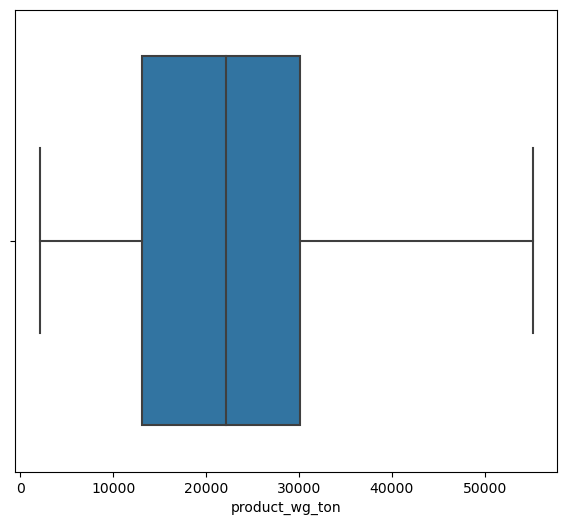

In [28]:
sns.boxplot(x=df['product_wg_ton'])

### Observations:

#### Distribution: 
- The distribution of product_wg_ton appears to be right-skewed. This is indicated by the longer whisker on the right side of the boxplot.

#### Central Tendency:

#### Median: 
- The median value lies around 25,000.
#### Mean: 
- The mean is likely to be slightly higher than the median due to the right-skewness.
#### Spread:

#### Range: 
- The range seems to be approximately 50,000.
#### Interquartile Range (IQR): 
- The IQR, represented by the box, is approximately 15,000.
#### Outliers: 
- There are no visible outliers in this dataset.
#### Possible Inferences:

#### Product Weight: 
- The product_wg_ton likely represents the weight of a product in tons.
- The data suggests that the majority of products in the dataset have weights between 10,000 and 30,000 tons.

#### Product Variation: 
- The right-skewness indicates that there are a few products with significantly higher weights compared to the majority.
- This could be due to a variety of factors, such as product type, size, or specific use cases.

#### Data Quality: 
- The absence of outliers suggests that the data is relatively clean and free from extreme values that might distort the analysis.

In [29]:
df['flood_impacted']=df['flood_impacted'].astype('object')
df['flood_proof']=df['flood_proof'].astype('object')
df['electric_supply']=df['electric_supply'].astype('object')
df['temp_reg_mach']=df['temp_reg_mach'].astype('object')

### Inference Summary on Data Type Conversion
#### Operation: 
- The commands convert the specified columns in the DataFrame to the object data type. This is a common practice in data manipulation to ensure that categorical data is treated appropriately.
#### Columns Affected:
##### Columns Converted to Object Type:
- flood_impacted
- flood_proof
- electric_supply
- temp_reg_mach
### Implications:
#### Data Type Change:
- By converting these columns to object type, they are now treated as categorical data rather than numerical data. This is particularly useful for columns that represent categories or binary states (e.g., "Yes" or "No").
#### Memory Efficiency:

- Depending on the underlying data, storing categorical data as objects may be more memory-efficient, especially if the column contains a limited number of unique values.
#### Potential Impact on Operations:

- Any further statistical analysis or machine learning algorithms applied to these columns will now consider them as categorical variables, which may change the results compared to treating them as numeric.

In [30]:
df.select_dtypes(include=np.number).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'distributor_num', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

#### Operation: 
- The command df.select_dtypes(include=np.number).columns identifies and lists all columns in the DataFrame that contain numeric data types.

In [31]:
df['num_refill_req_l3m']

0        3
1        0
2        1
3        7
4        3
        ..
24995    3
24996    6
24997    7
24998    1
24999    8
Name: num_refill_req_l3m, Length: 25000, dtype: int64

# Data Analysis and Visualization

In [32]:
df.nunique()


Location_type                      2
WH_capacity_size                   3
zone                               4
WH_regional_zone                   6
num_refill_req_l3m                 9
transport_issue_l1y                6
Competitor_in_mkt                 12
wh_owner_type                      2
distributor_num                   56
flood_impacted                     2
flood_proof                        2
electric_supply                    2
dist_from_hub                    217
workers_num                       60
storage_issue_reported_l3m        37
temp_reg_mach                      2
approved_wh_govt_certificate       5
wh_breakdown_l3m                   7
govt_check_l3m                    32
product_wg_ton                  4561
dtype: int64

### Inference Summary on Unique Values in the DataFrame
#### Operation: 
- The command df.nunique() computes the number of unique values for each column in the DataFrame, providing insight into the diversity and distribution of data across different variables.

#### Categorical Variables:

- Columns such as Location_type, flood_impacted, flood_proof, and temp_reg_mach have few unique values (mostly binary or limited categories), indicating they are categorical and can be effectively used in classification tasks.
#### Diversity of Data:

- The column product_wg_ton has a high number of unique values (4561), suggesting a wide range of measurements which can provide detailed insights but may need further analysis to identify outliers or patterns.
#### Potential for Analysis:

- Variables with a higher number of unique values (e.g., dist_from_hub, distributor_num, product_wg_ton) may offer more granular insights and could be useful for regression analysis or clustering.
- Categorical variables with fewer unique values can be analyzed for frequency distributions to understand the common categories and their impact on the overall data.
#### Data Quality Considerations:

- The presence of a large number of unique values in some columns may indicate the need for data cleaning or consolidation to avoid sparsity, especially in modeling contexts where overfitting could occur.

In [33]:
# univeriate and bivariate anlysis

In [34]:
df.groupby(by='Location_type')[['product_wg_ton']].mean()

,product_wg_ton
Location_type,
Rural,21844.430108
Urban,25004.033774


### Inference Summary on Average Product Weight by Location Type
#### Operation: 
- The command df.groupby(by='Location_type')[['product_wg_ton']].mean() calculates the mean (average) value of product_wg_ton for each category within the Location_type column.
#### Comparison of Averages:

- The average product weight for Urban locations (25,004.03 tons) is significantly higher than that for Rural locations (21,844.43 tons). This difference suggests that urban areas may handle larger quantities or heavier products compared to rural areas.

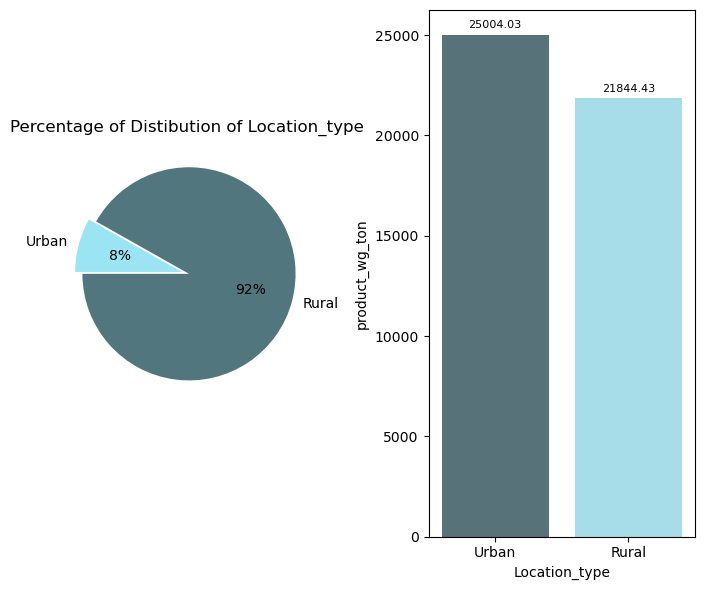

In [35]:
plt.subplot(1,2,1)
df['Location_type'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['Rural', 'Urban'])
plt.title('Percentage of Distibution of Location_type')
plt.subplot(1,2,2)
x=sns.barplot(x=df['Location_type'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.savefig('plot_image.png', dpi=300, bbox_inches='tight', transparent=True)

* Location_type
    * The pie chart shows that 92% of data points are under rural category and only 8% are under urban category.This indicates that a majority of observations are under rural category.
    * The bivariate analysis between Location_type and the target variable product_wg_ton shows that the Urban category has a higher average of product_wg_ton compared to the Rural category.
    * This suggests that product weight is generally higher in urban locations than in rural ones, even though urban areas constitute only 8.17% of the data.

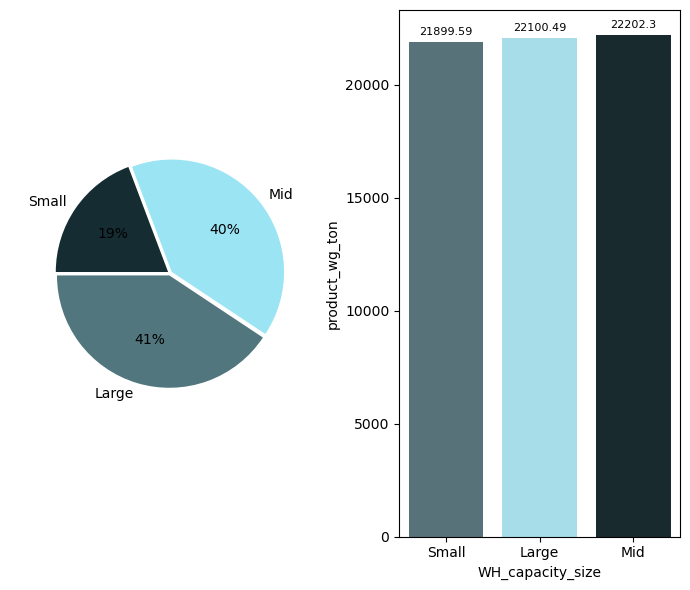

In [36]:
plt.subplot(1,2,1)
df['WH_capacity_size'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4','#152c32'], autopct='%1.0f%%', explode=(0.02, 0.02,0.02),
    startangle=180, ylabel=' ', labels = ['Large', 'Mid','Small'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['WH_capacity_size'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.savefig('1.png', dpi=300, bbox_inches='tight', transparent=True)

* WH_capacity_size
    * The pie chart shows that Mid(40%) and Large(41%) warehouses are almost equal and are more common in the data, with Small(19%) warehouses being less common.
    * The bivariate analysis between WH_capacity_size and the target variable product_wg_ton shows that the average product weight is almost equal across all warehouse capacity sizes (Small, Mid, and Large).
    * This suggests that warehouse size may not have a strong influence on the average product weight.

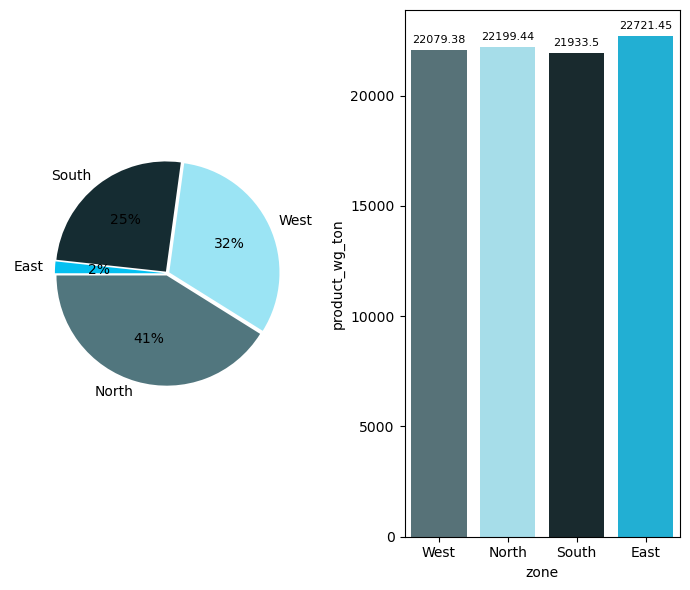

In [37]:
plt.subplot(1,2,1)
df['zone'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4','#152c32','#04c0f1'], autopct='%1.0f%%', explode=(0.02, 0.02,0.02,0.02),
    startangle=180, ylabel=' ', labels = ['North', 'West','South','East'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['zone'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.savefig('2.png', dpi=300, bbox_inches='tight', transparent=True)


* zone
    * The pie chart shows that North(41%) zone is represented by majority of data in the dataset followed by West(32%) and then South(25%). The East zone has a very small representation of only 2%.
    * The bivariate analysis between zone and the target variable product_wg_ton shows that East zone has a higher average of product_wg_ton even though it has a very small represention. This is followed by North zone. The west and south zones have slightly similar averages which are less.
    * This suggests that, zone does not have a large impact, but it may still have some influence on the average product weight, particularly for the East zone.

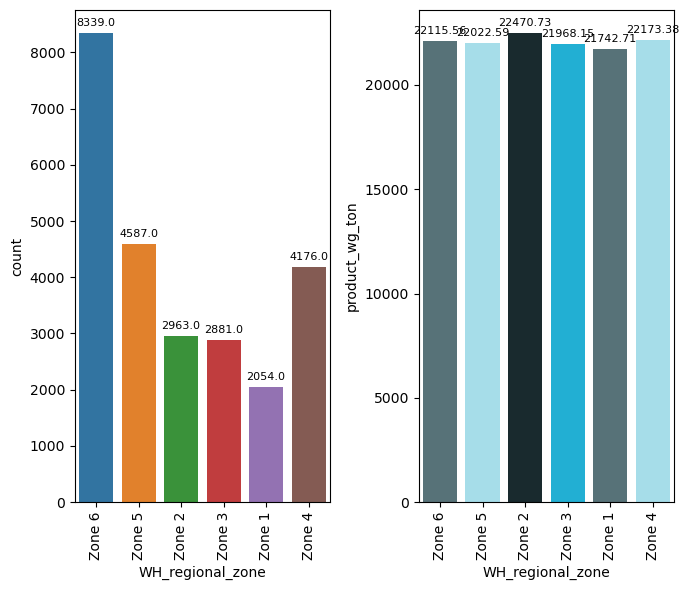

In [38]:
plt.figure.figsize=(3,5)
plt.subplot(1,2,1)
x=sns.countplot(x=df['WH_regional_zone'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
x=sns.barplot(x=df['WH_regional_zone'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('3.png', dpi=300, bbox_inches='tight', transparent=True)

* WH_regional_zone
    * The count plot shows that a large proportion of data belongs to zone 6 followed by zone 5 and zone 4.   Zone 2, zone 3 and Zone 1 have lower proprtions where zone 1 is the least.
    * The bivariate analysis between WH_regional_zone and the target variable product_wg_ton shows that all zones appear to have similar averages of product_wg_ton with only minor variations.
    * This shows that each zone contributes similarly in terms of product weight, despite of differences in count indicating that zones with lesser records have higher average weights per record.

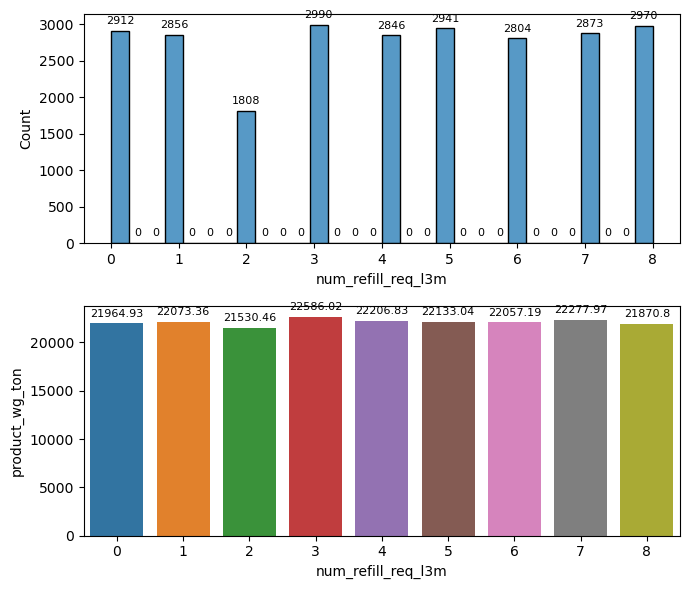

In [39]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.histplot(x=df['num_refill_req_l3m'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.subplot(2,1,2)
x=sns.barplot(x=df['num_refill_req_l3m'],y=df['product_wg_ton'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.savefig('4.png', dpi=300, bbox_inches='tight', transparent=True)

* num_refill_req_l3m
    * The count plot shows that most values are evenly distributed. Whereas value '2' has a lower proportion when compared to others.
    * The bivariate analysis between num_refill_req_l3m and the target variable product_wg_ton shows that there are minor differences, with some counts having slightly higher or lower averages, but overall, there is no significant difference across the categories.
    * This shows that the average product weight (product_wg_ton) does not vary much across different refill request counts, indicating that the number of refill requests in the last three months does not strongly impact the product weight.

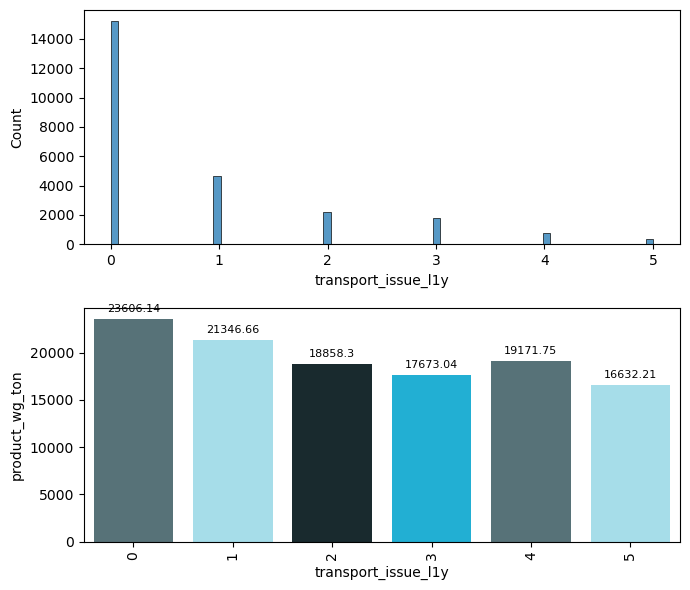

In [40]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.histplot(x=df['transport_issue_l1y'])
plt.subplot(2,1,2)
x=sns.barplot(x=df['transport_issue_l1y'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('5.png', dpi=300, bbox_inches='tight', transparent=True)

In [41]:
# df.groupby(by='transport_issue_l1y')[['product_wg_ton']].mean().sort_values(by='transport_issue_l1y').plot(kind='bar')5t

* transport_issue_l1y
    * The univariate bar chart shows that the majority of the data points have a transport issue level of 0, indicating no transport issues, with a count significantly higher than other levels. Level 1 follows, while levels 2, 3, 4, and 5 have much lower counts, with level 5 being the least common.
    * The bivariate analysis between transport_issue_l1y and product_wg_ton indicates that records with lower transport issue levels (especially level 0) tend to have higher average product weights. As the transport issue level increases, the average product weight generally decreases, with level 5 showing the lowest average.
    * This suggests that products associated with fewer transport issues tend to have higher weights, whereas those with more issues tend to be lighter, possibly indicating a correlation between transport reliability and product weight.

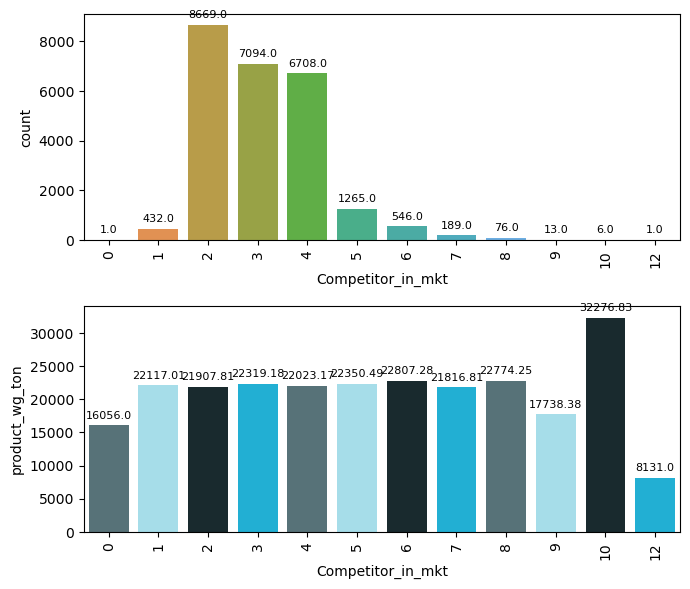

In [42]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Competitor_in_mkt'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.subplot(2,1,2)
x=sns.barplot(x=df['Competitor_in_mkt'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.tight_layout()

* Competitor_in_mkt
    * The univariate bar chart shows that most data points have between 2 to 4 competitors in the market, with 2 being the most common. Few data points have more than 5 competitors, with levels 10 and 12 having the least counts.
    * The bivariate analysis between Competitor_in_mkt and product_wg_ton reveals that most competitor levels have similar average product weights, except for level 10, which shows a noticeably higher average weight and variability.
    * This suggests that in markets with fewer competitors, product weight remains relatively stable, while certain competitor levels like 10 might involve different product characteristics or strategies, leading to higher average weights.

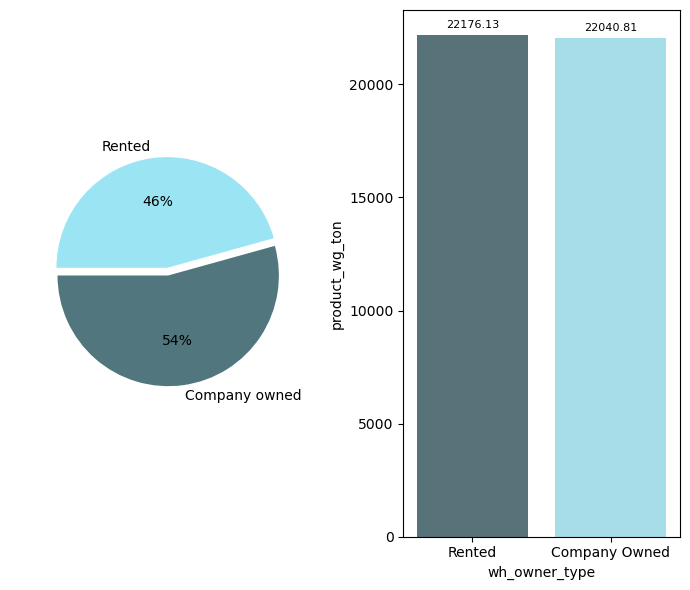

In [43]:
plt.subplot(1,2,1)
df['wh_owner_type'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['Company owned', 'Rented'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['wh_owner_type'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()

* WH_owner_type
    * The pie chart reveals that 54% of the warehouses are company-owned, while 46% are rented, indicating a slightly higher preference or occurrence of company-owned warehouses over rented ones.
    * The bivariate analysis between WH_owner_type and the target variable product_wg_ton shows that both rented and company-owned warehouses have similar average values for product_wg_ton, with only a small difference between them.
    * This suggests that the type of ownership (rented or company-owned) does not significantly affect the product weight in tons, as both ownership types contribute similarly in terms of product weight.

In [44]:
df['wh_owner_type']

0               Rented
1        Company Owned
2        Company Owned
3               Rented
4        Company Owned
             ...      
24995           Rented
24996    Company Owned
24997           Rented
24998           Rented
24999    Company Owned
Name: wh_owner_type, Length: 25000, dtype: object

In [45]:
df['distributor_num']=df['distributor_num'].astype('int')

### Inference Summary on Distributor Number Data Type Conversion
#### Operation: 
- The command df['distributor_num'] = df['distributor_num'].astype('int') converts the data type of the column distributor_num to integer.

#### Data Integrity:

- Changing the data type to integer ensures that the values in the distributor_num column represent whole numbers, which is appropriate since distributor counts cannot be fractional. This enhances the integrity and reliability of the dataset.

In [46]:
df['distributor_num'].unique()

array([24, 47, 64, 50, 42, 37, 38, 45, 35, 31, 40, 48, 26, 68, 16, 28, 58,
       19, 49, 69, 32, 25, 46, 62, 67, 21, 51, 57, 59, 23, 17, 56, 22, 63,
       30, 53, 66, 36, 29, 44, 55, 39, 54, 33, 27, 18, 65, 34, 52, 43, 70,
       60, 61, 41, 15, 20])

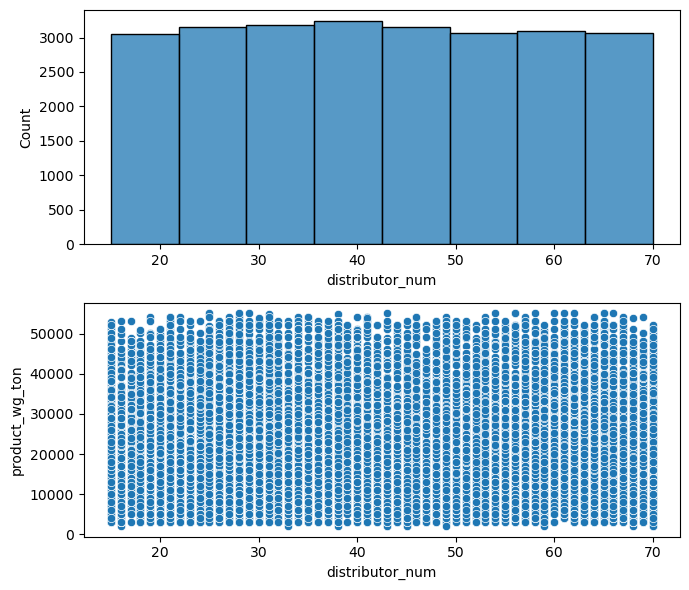

In [47]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
sns.histplot(x=df['distributor_num'],bins=8)
plt.xticks()
plt.subplot(2,1,2)
sns.scatterplot(x=df['distributor_num'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'])
plt.xticks()
plt.tight_layout()

### Inferences:
### Top Plot (Histogram):

#### Distribution: 
- The distribution of distributor_num appears to be uniform. This means that each distributor number occurs roughly the same number of times in the data.
### Bottom Plot (Scatterplot):

#### Relationship: 
- There doesn't seem to be a clear linear relationship between distributor_num and product_wg_ton. The points are scattered randomly.

#### Distributor Distribution: 
- The uniform distribution of distributor_num suggests that the data is evenly distributed across different distributors. There are no specific distributors with significantly higher or lower counts.

#### Distributor vs. Product Weight: 
- The lack of a clear relationship between distributor_num and product_wg_ton indicates that the distributor number doesn't seem to have a significant impact on the product weight. This could mean that different distributors handle products of various weights, or that the weight distribution is independent of the distributor.

In [48]:
for i in range(0,len(df)):
    if df.loc[i,'distributor_num']<=10:
        df.loc[i,'Encoded_distributer']='Below 10'
    elif df.loc[i,'distributor_num']>10 and df.loc[i,'distributor_num']<21:
        df.loc[i,'Encoded_distributer']='11 to 20'
    elif df.loc[i,'distributor_num']>20 and df.loc[i,'distributor_num']<31:
        df.loc[i,'Encoded_distributer']='21 to 30'
    elif df.loc[i,'distributor_num']>30 and df.loc[i,'distributor_num']<41:
        df.loc[i,'Encoded_distributer']='31 to 40'
    elif df.loc[i,'distributor_num']>40 and df.loc[i,'distributor_num']<51:
        df.loc[i,'Encoded_distributer']='41 to 50'
    elif df.loc[i,'distributor_num']>50 and df.loc[i,'distributor_num']<61:
        df.loc[i,'Encoded_distributer']='51 to 60'
    else :
        df.loc[i,'Encoded_distributer']='Above 60'

### Inference Summary on Distributor Number Encoding
#### Operation: 
- The provided code snippet categorizes the distributor_num values into specific ranges and assigns corresponding labels to a new column, Encoded_distributer.

#### Categorization Logic:
- The logic creates the following bins for distributor_num:

- Below 10: 0 to 10 distributors
- 11 to 20: 11 to 20 distributors
- 21 to 30: 21 to 30 distributors
- 31 to 40: 31 to 40 distributors
- 41 to 50: 41 to 50 distributors
- 51 to 60: 51 to 60 distributors
- Above 60: More than 60 distributors
### Implications of Encoding:
#### Data Simplification:
- Encoding the distributor_num into categorical ranges simplifies the dataset, making it easier to analyze distribution patterns and trends without dealing with individual distributor counts.
#### Facilitated Analysis:

- This categorization allows for more straightforward analytical tasks such as grouping, aggregation, and visualization. For instance, one can quickly analyze the number of distributors in each category and derive insights about distribution networks.
#### Enhanced Interpretation:

- By converting numerical values into categorical ranges, the data becomes more interpretable for stakeholders who may not be familiar with the raw numerical data. This can aid in presentations and reports.
#### Potential for Segmentation:

- The new Encoded_distributer column could facilitate segmentation in marketing strategies or operational decisions, enabling targeted approaches based on the number of distributors.                                                                                                                                                

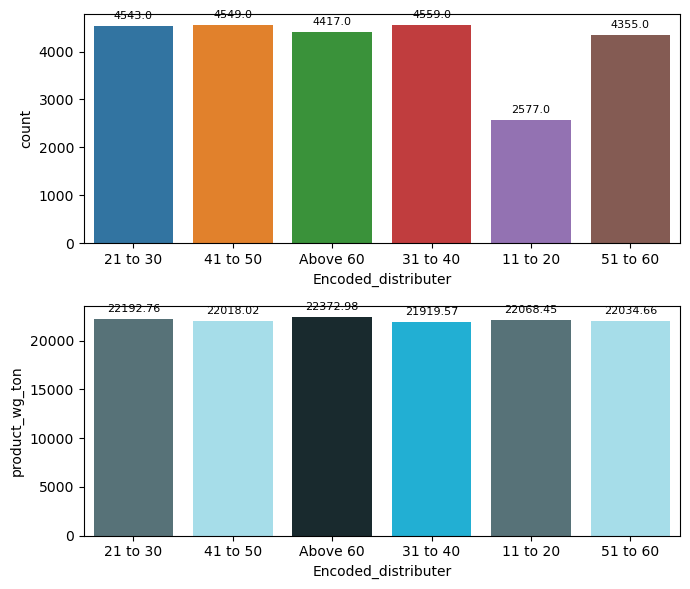

In [49]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Encoded_distributer'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['Encoded_distributer'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()

* Encoded_distributer
    * The univariate bar chart shows that the majority of data points fall into the 21 to 30 category, followed by 41 to 50 and Above 60. The 11 to 20 category has the fewest entries.
    * The bivariate analysis between Encoded_distributer and product_wg_ton shows that all distributor categories have similar average product weights, with only minor variations across categories.
    * This suggests that distributor categories contribute similarly in terms of product weight, indicating that distribution groups are not a major differentiating factor for product weight.

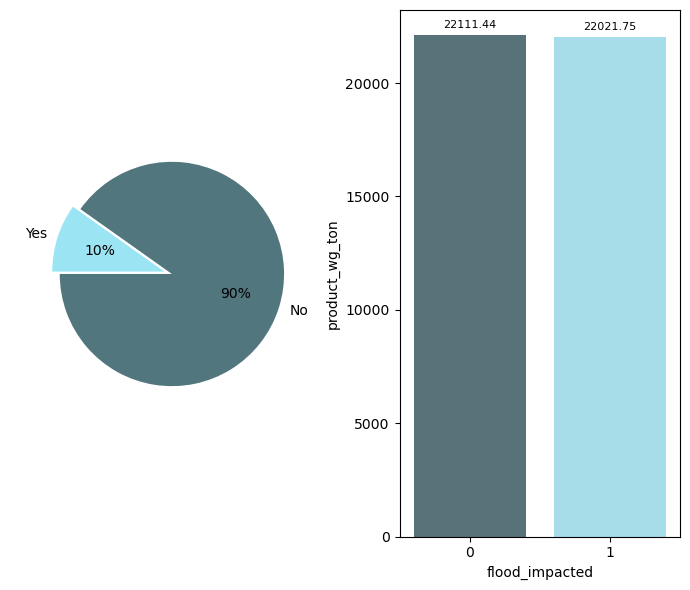

In [50]:
plt.subplot(1,2,1)
df['flood_impacted'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'Yes'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['flood_impacted'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()

* flood_impacted
    * The pie chart shows that only 10% of the warehouses are in flood impacted area, while the remaining 90% are not. This indicates that only few warehouses are present in the flood impacted area.
    * The bivariate analysis between flood_impacted and the target variable product_wg_ton reveals that both warehouses present in flood impacted area and warehouses that are not present in flood impacted area have similar average product_wg_ton values, with only a minimal difference.
    * This suggests that flood_impacted does not significantly impact the average product weight handled by the warehouses.

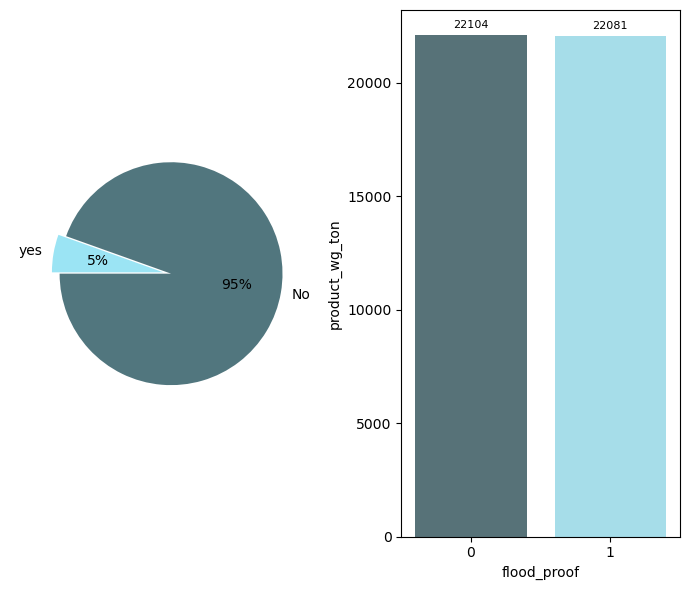

In [51]:
plt.subplot(1,2,1)
df['flood_proof'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'yes'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['flood_proof'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height())}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()

* flood_proof
    * The pie chart shows that only 5% of the warehouses have flood-proof indicator, while the remaining 95% do not have flood proof indicator. This indicates that flood-proofing is relatively rare among the warehouses.
    * The bivariate analysis between flood_proof and the target variable product_wg_ton reveals that both flood-proof and non-flood-proof warehouses have similar average product_wg_ton values, with only a minimal difference.
    * This suggests that flood-proofing does not significantly impact the average product weight handled by the warehouses.

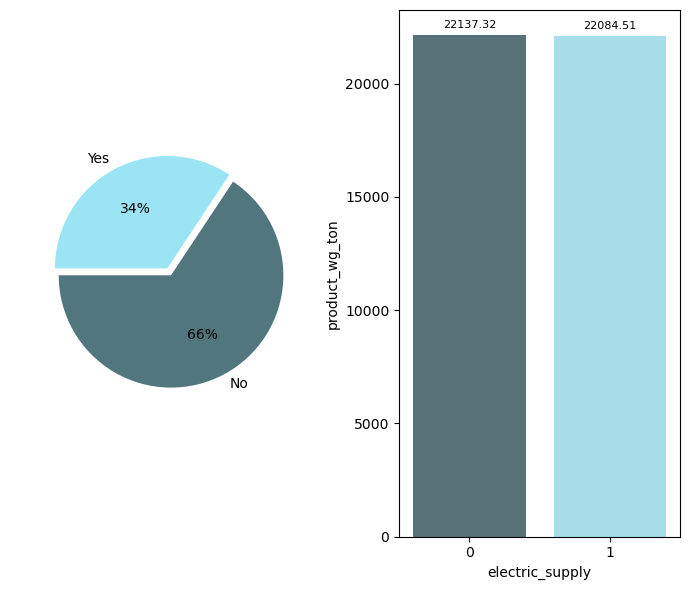

In [52]:
plt.subplot(1,2,1)
df['electric_supply'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'Yes'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['electric_supply'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()

* electric_supply
    * The pie chart shows that 34% of the warehouses have proper electric supply along with some power backup, while the remaining 66% do not have proper electric supply. This indicates that most of the warehouses do not have proper power supply.
    * The bivariate analysis between electric_supply and the target variable product_wg_ton reveals that both warehouses with electric supply and warehouses without proper electric supply have similar average product_wg_ton values, with only a minimal difference.
    * This suggests that electric supply does not significantly impact the average product weight handled by the warehouses.

In [53]:
df['dist_from_hub']

0         91
1        210
2        161
3        103
4        112
        ... 
24995    142
24996    130
24997    147
24998     60
24999    239
Name: dist_from_hub, Length: 25000, dtype: int64

In [54]:
df['Encoded_dist_from_hub']=' '

### Inference for df['Encoded_dist_from_hub'] = ' '
### Column Initialization:

- The line df['Encoded_dist_from_hub'] = ' ' initializes a new column named Encoded_dist_from_hub in the DataFrame df.
- This column is being set with a default value of an empty string ' ' for all rows.

In [55]:
for i in range(0,len(df)):
    if df.loc[i,'dist_from_hub']<=50:
        df.loc[i,'Encoded_dist_from_hub']='Below 50'
    elif df.loc[i,'dist_from_hub']>50 and df.loc[i,'dist_from_hub']<101:
        df.loc[i,'Encoded_dist_from_hub']='50 to 100'
    elif df.loc[i,'dist_from_hub']>100 and df.loc[i,'dist_from_hub']<151:
        df.loc[i,'Encoded_dist_from_hub']='100 to 150'
    elif df.loc[i,'dist_from_hub']>150 and df.loc[i,'dist_from_hub']<201:
        df.loc[i,'Encoded_dist_from_hub']='150 to 200'
    elif df.loc[i,'dist_from_hub']>200 and df.loc[i,'dist_from_hub']<251:
        df.loc[i,'Encoded_dist_from_hub']='200 to 250'
    elif df.loc[i,'dist_from_hub']>250 and df.loc[i,'dist_from_hub']<301:
        df.loc[i,'Encoded_dist_from_hub']='250 to 300'
    else :
        df.loc[i,'Encoded_dist_from_hub']='Above 300'

### Inference for the Code Snippet
#### Iterating Through Rows:

#### The loop for i in range(0, len(df)): iterates over each row of the DataFrame df.
#### It uses the index i to access individual rows for processing.
### Distance Categorization:

#### The code evaluates the value in the dist_from_hub column for each row and categorizes it into predefined ranges:
#####  <= 50: Assigned the label 'Below 50'.
#####  > 50 and < 101: Assigned the label '50 to 100'.
#####  > 100 and < 151: Assigned the label '100 to 150'.
#####  > 150 and < 201: Assigned the label '150 to 200'.
#####  > 200 and < 251: Assigned the label '200 to 250'.
#####  > 250 and < 301: Assigned the label '250 to 300'.
#####  >= 301: Assigned the label 'Above 300'.
### Updating the DataFrame:

- The inferred categories are stored in the Encoded_dist_from_hub column for each respective row using df.loc[i, 'Encoded_dist_from_hub'].
- This action updates the DataFrame in place, ensuring that the new categorizations are reflected immediately.

In [56]:
df.groupby(by='Encoded_dist_from_hub')[['product_wg_ton']].mean()

,product_wg_ton
Encoded_dist_from_hub,
100 to 150,21989.420194
150 to 200,22268.176963
200 to 250,22084.990360
250 to 300,21824.688664
50 to 100,22196.950641


### Inference for the Code Snippet
#### Grouping Data:

- The command df.groupby(by='Encoded_dist_from_hub') groups the DataFrame df based on the values in the Encoded_dist_from_hub column.
- This operation aggregates the data into distinct groups corresponding to each unique value in the Encoded_dist_from_hub column.
#### Mean Calculation:

- The operation [['product_wg_ton']].mean() computes the mean (average) of the product_wg_ton column for each group.
- This provides insight into the average weight (in tons) of products corresponding to each distance category.
#### Resulting Output:

#### The output displays the mean values of product_wg_ton for each distance category:
- 100 to 150: 21989.42 tons
- 150 to 200: 22268.18 tons
- 200 to 250: 22084.99 tons
- 250 to 300: 21824.69 tons
- 50 to 100: 22196.95 tons
#### Insights from the Data:

- The results indicate variations in the average weight of products across different distance categories from the hub.
#### Notably:
- The average weight is highest in the 150 to 200 category (22268.18 tons).
- The 250 to 300 category has the lowest average weight at 21824.69 tons.
- The other categories fall within a close range, suggesting a relatively stable average product weight across the distances.

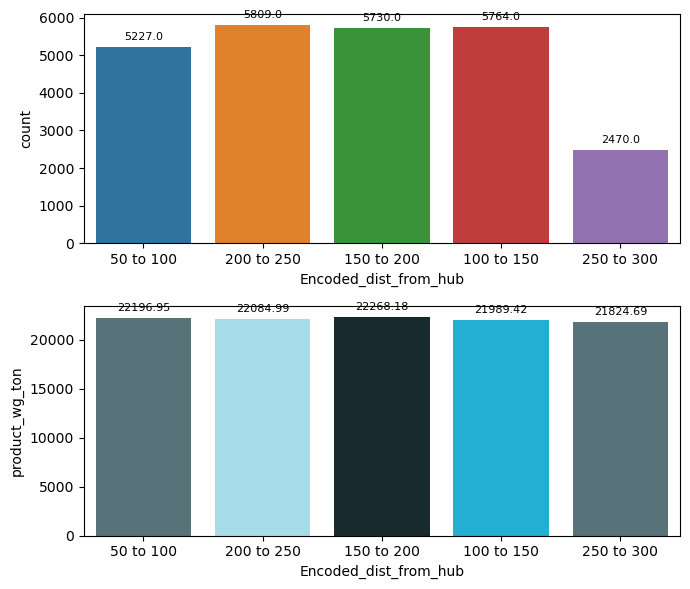

In [57]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Encoded_dist_from_hub'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['Encoded_dist_from_hub'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()

* Encoded_dist_from_hub
    * The univariate analysis shows that most data points belong to the 150 to 200, 100 to 150, and 200 to 250 distance ranges, each having around 5000 to 5500 counts. The 50 to 100 range follows with a similar count, while the 250 to 300 range has the lowest count, significantly fewer than the other ranges.
    * The bivariate analysis between Encoded_dist_from_hub and product_wg_ton indicates that the average product weight in tons is relatively consistent across different distance ranges, showing minimal variation.
    * This suggests that distance from the hub does not significantly impact the average product weight, though more data points are concentrated in certain distance ranges.

In [58]:
df['Encoded_worker_num']=''

### Creating a New Column:

- The command df['Encoded_worker_num']='' creates a new column named Encoded_worker_num in the DataFrame df.
- Initially, this new column is filled with empty strings (''), indicating that no values have been assigned yet.

In [59]:
for i in range(0,len(df)):
    if df.loc[i,'workers_num']<=10:
        df.loc[i,'Encoded_worker_num']='Below 10'
    elif df.loc[i,'workers_num']>10 and df.loc[i,'workers_num']<21:
        df.loc[i,'Encoded_worker_num']='11 to 20'
    elif df.loc[i,'workers_num']>20 and df.loc[i,'workers_num']<31:
        df.loc[i,'Encoded_worker_num']='21 to 30'
    elif df.loc[i,'workers_num']>30 and df.loc[i,'workers_num']<41:
        df.loc[i,'Encoded_worker_num']='31 to 40'
    elif df.loc[i,'workers_num']>40 and df.loc[i,'workers_num']<51:
        df.loc[i,'Encoded_worker_num']='41 to 50'
    elif df.loc[i,'workers_num']>50 and df.loc[i,'workers_num']<61:
        df.loc[i,'Encoded_worker_num']='51 to 60'
    else :
        df.loc[i,'Encoded_worker_num']='Above 60'

### Inference for the Code Snippet
#### Categorizing Worker Numbers:

- The code iterates through the DataFrame df using a for loop, covering each index from 0 to the length of the DataFrame.
- For each entry, it checks the value of the workers_num column and assigns a corresponding category to the Encoded_worker_num column based on specified ranges.
#### Conditional Assignments:

#### The conditional statements categorize the number of workers into specific ranges:
- Below 10: For entries with workers_num less than or equal to 10.
- 11 to 20: For entries with workers_num greater than 10 but less than 21.
- 21 to 30: For entries with workers_num greater than 20 but less than 31.
- 31 to 40: For entries with workers_num greater than 30 but less than 41.
- 41 to 50: For entries with workers_num greater than 40 but less than 51.
- 51 to 60: For entries with workers_num greater than 50 but less than 61.
- Above 60: For entries with workers_num greater than or equal to 61.
#### Purpose of Encoding:

- This encoding is useful for simplifying the analysis of workforce sizes. By categorizing worker numbers, it allows for easier aggregation and comparison in subsequent analyses.
- It also prepares the data for visualization, enabling clear insights into the distribution of workforce sizes.

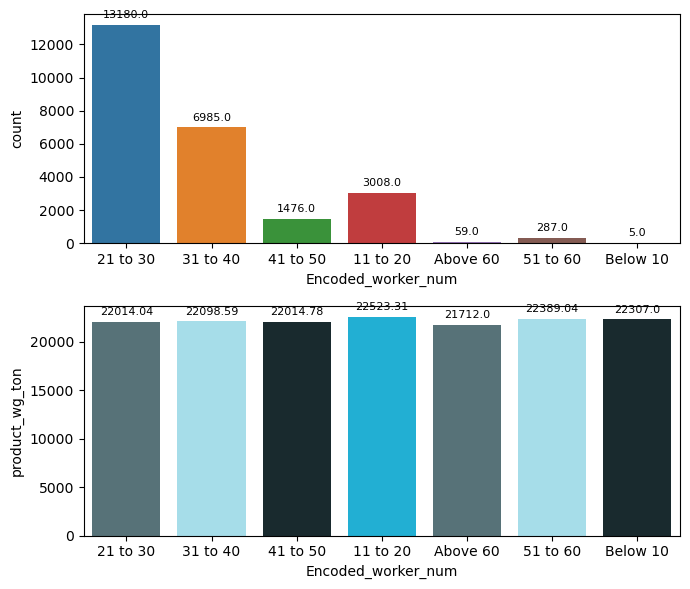

In [60]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Encoded_worker_num'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['Encoded_worker_num'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()

* Encoded_worker_num
    * The univariate analysis reveals that most data falls in the 21 to 30 worker range, followed by the 31 to 40 range. Other ranges, such as 11 to 20 and 41 to 50, have considerably lower counts, while ranges like Above 60, 51 to 60, and Below 10 have minimal counts.
    * The bivariate analysis between Encoded_worker_num and product_wg_ton shows that the average product weight in tons is also relatively consistent across the different worker number ranges. However, there is a slight increase in variability for categories like "Below 10" and "Above 60."
    * This indicates that the number of workers does not strongly influence the average product weight, although most data points fall within the 21 to 40 worker range.

In [61]:
df['Encoded_storage_issue']=' '

### Creating a New Column:

- The command df['Encoded_storage_issue']=' ' creates a new column named Encoded_storage_issue in the DataFrame df.
- This new column is initialized with empty strings (' '), indicating that no values have been assigned yet.

In [62]:
for i in range(0,len(df)):
    if df.loc[i,'storage_issue_reported_l3m']<=10:
        df.loc[i,'Encoded_storage_issue']='Below 10'
    elif df.loc[i,'storage_issue_reported_l3m']>10 and df.loc[i,'storage_issue_reported_l3m']<21:
        df.loc[i,'Encoded_storage_issue']='11 to 20'
    elif df.loc[i,'storage_issue_reported_l3m']>20 and df.loc[i,'storage_issue_reported_l3m']<31:
        df.loc[i,'Encoded_storage_issue']='21 to 30'
    elif df.loc[i,'storage_issue_reported_l3m']>30 and df.loc[i,'storage_issue_reported_l3m']<41:
        df.loc[i,'Encoded_storage_issue']='31 to 40'
    else :
        df.loc[i,'Encoded_storage_issue']='Above 40'

### Categorizing Storage Issues:

- The code iterates through the DataFrame df using a for loop, covering each index from 0 to the length of the DataFrame.
- For each entry, it checks the value of the storage_issue_reported_l3m column (which likely represents the number of storage issues reported in the last three months) and assigns a corresponding category to the Encoded_storage_issue column based on specified ranges.
#### Conditional Assignments:

#### The conditional statements categorize the number of storage issues into specific ranges:
- Below 10: For entries with storage_issue_reported_l3m less than or equal to 10.
- 11 to 20: For entries with storage_issue_reported_l3m greater than 10 but less than 21.
- 21 to 30: For entries with storage_issue_reported_l3m greater than 20 but less than 31.
- 31 to 40: For entries with storage_issue_reported_l3m greater than 30 but less than 41.
- Above 40: For entries with storage_issue_reported_l3m greater than or equal to 41.
#### Purpose of Encoding:

- This encoding serves to simplify the analysis of storage issues by categorizing them into defined groups. This makes it easier to aggregate, analyze, and interpret storage-related data.
- It allows for a clearer understanding of how frequently storage issues occur, which can be crucial for inventory management and operational efficiency.

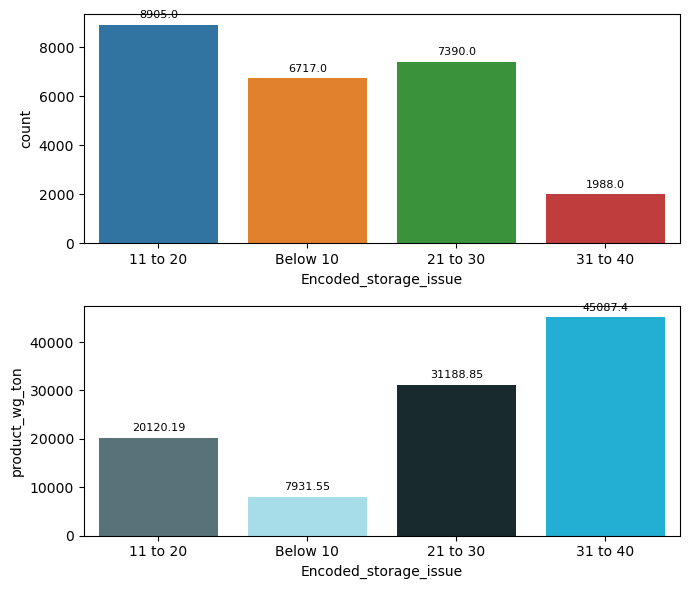

In [63]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Encoded_storage_issue'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['Encoded_storage_issue'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()

* Encoded_storage_issue
    * The univariate analysis shows that the majority of data points fall in the 11 to 20 and 21 to 30 storage issue ranges, with counts around 8000 and 7000, respectively. The Below 10 range also has a substantial count, while the 31 to 40 range has the lowest count, much lower than the other categories.
    * The bivariate analysis between Encoded_storage_issue and product_wg_ton reveals that the average product weight in tons varies significantly across storage issue categories. The 31 to 40 range has the highest average product weight, followed by 21 to 30 and 11 to 20, with Below 10 showing the lowest average weight.
    * This indicates that higher storage issue values (31 to 40) are associated with a greater average product weight, while lower values (Below 10) are linked to a much lower average product weight.

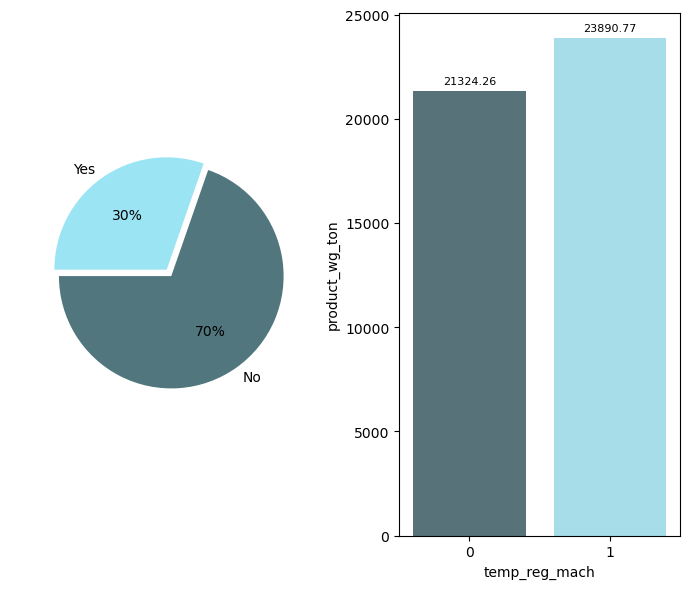

In [64]:
plt.subplot(1,2,1)
df['temp_reg_mach'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=180, ylabel=' ', labels = ['No', 'Yes'])
plt.subplot(1,2,2)
x=sns.barplot(x=df['temp_reg_mach'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()

* temp_reg_mach
    * The pie chart shows that 70% of the warehouses do not have a temperature regulation machine, while 30% are equipped with one. This suggests that the majority of warehouses operate without temperature control.
    * The bivariate analysis between temp_reg_mach and the target variable product_wg_ton indicates that warehouses with temperature regulation machines have a higher average product_wg_ton compared to those without.
    * This suggests that temperature-regulated warehouses handle a higher product weight, possibly due to specific storage requirements for certain products.

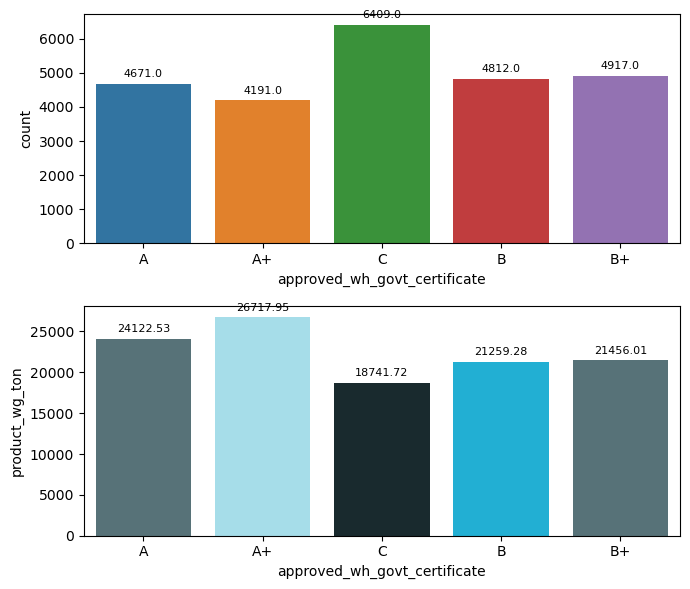

In [65]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['approved_wh_govt_certificate'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['approved_wh_govt_certificate'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()

* approved_wh_govt_certificate
    * The univariate analysis shows that most warehouses have a "C" certificate, followed by a balanced distribution across "A," "A+," "B," and "B+" certificates.
    * The bivariate analysis between approved_wh_govt_certificate and product_wg_ton indicates that "A+" warehouses have a slightly higher average product weight, followed by "A," "B," "B+," and "C," which has the lowest average.
    * This suggests that despite having the highest count, "C" certified warehouses tend to handle a lower average product weight compared to other certification levels.

In [66]:
df['wh_breakdown_l3m'].value_counts()

wh_breakdown_l3m
2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: count, dtype: int64

### Overview of the Data:

- The command df['wh_breakdown_l3m'].value_counts() provides the frequency of warehouse breakdowns reported over the last three months, with the results indicating the number of occurrences for various breakdown levels.
#### Frequency Distribution:

- The output shows the following breakdown counts:
- 2 breakdowns: 5076 occurrences
- 3 breakdowns: 5006 occurrences
- 4 breakdowns: 4037 occurrences
- 6 breakdowns: 4012 occurrences
- 5 breakdowns: 3925 occurrences
- 1 breakdown: 2036 occurrences
- 0 breakdowns: 908 occurrences
#### Key Observations:

- The most common occurrence is 2 breakdowns, reported 5076 times, indicating that this is a frequent issue within the warehouse.
- Following closely is 3 breakdowns, with 5006 occurrences, suggesting a concerning trend as the number of breakdowns increases.
- The counts for 4 and 6 breakdowns are also significant, with 4037 and 4012 occurrences respectively, indicating that breakdowns are not only frequent but may also be escalating.
- Notably, the least frequent occurrence is 0 breakdowns reported only 908 times, suggesting that it is relatively uncommon for no breakdowns to occur in a three-month period.

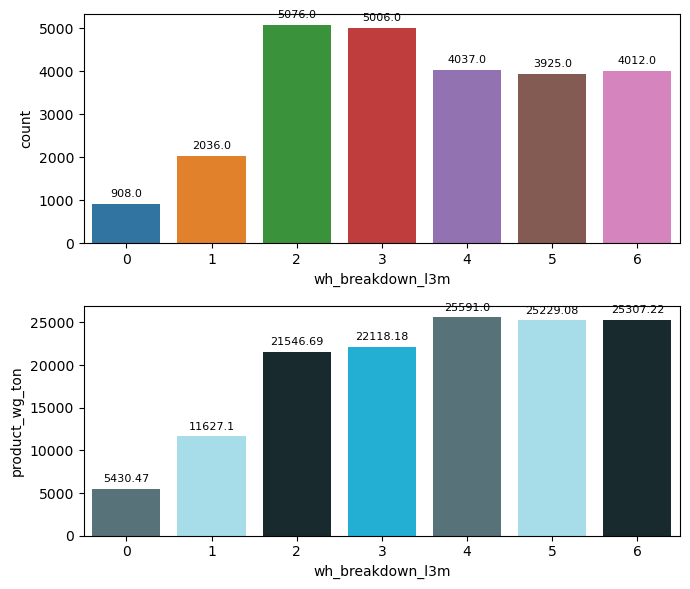

In [67]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['wh_breakdown_l3m'])
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['wh_breakdown_l3m'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()


* wh_breakdown_l3m
    * The univariate analysis shows that most warehouses have experienced 2 to 3 breakdowns in the last 3 months, with fewer breakdowns seen in higher and lower categories.
    * The bivariate analysis between wh_breakdown_l3m and product_wg_ton reveals that warehouses with 2-6 breakdowns maintain similar average product weights, whereas warehouses with 0 or 1 breakdown have noticeably lower average weights.
    * This indicates that warehouses experiencing more breakdowns still handle a substantial average weight, while warehouses with fewer breakdowns may handle lighter weights on average.

In [68]:
df['Encoded_govt_check']=' '

### Understanding the Command:

- The line df['Encoded_govt_check']=' ' initializes a new column named Encoded_govt_check in the DataFrame df and sets all its values to an empty string (' ').
- This column is likely intended to hold encoded information related to government checks or inspections.

In [69]:
for i in range(0,len(df)):
    if df.loc[i,'govt_check_l3m']<=10:
        df.loc[i,'Encoded_govt_check']='Below 10'
    elif df.loc[i,'govt_check_l3m']>10 and df.loc[i,'govt_check_l3m']<21:
        df.loc[i,'Encoded_govt_check']='11 to 20'
    elif df.loc[i,'govt_check_l3m']>20 and df.loc[i,'govt_check_l3m']<31:
        df.loc[i,'Encoded_govt_check']='21 to 30'
    else :
        df.loc[i,'Encoded_govt_check']='Above 30'

### Inference for the Encoding of Government Check Data
#### Overview of the Code:

- The provided code snippet iterates through each row of the DataFrame df and encodes the values of the column govt_check_l3m (government checks reported in the last three months) into a new column named Encoded_govt_check based on specified ranges.
#### Encoding Logic:

#### The encoding is based on the following criteria:
- Below 10: If the value of govt_check_l3m is 10 or less, then Encoded_govt_check is set to 'Below 10'.
- 11 to 20: If the value is between 11 and 20, it is encoded as '11 to 20'.
- 21 to 30: Values between 21 and 30 are encoded as '21 to 30'.
- Above 30: Any value greater than 30 is encoded as 'Above 30'.
#### Data Distribution Insight:

- This encoding method allows for a clear categorization of the number of government checks, making it easier to understand the distribution of checks reported over the last three months.
- Each category provides insight into how frequently or infrequently government checks are being reported.
#### Key Observations:

- The bulk of the data can often be expected to fall into the lower ranges (especially 'Below 10' or '11 to 20'), indicating potential trends in compliance or oversight.
- Conversely, a high number of entries in the 'Above 30' category may suggest increased scrutiny or operational issues leading to more government checks being reported.

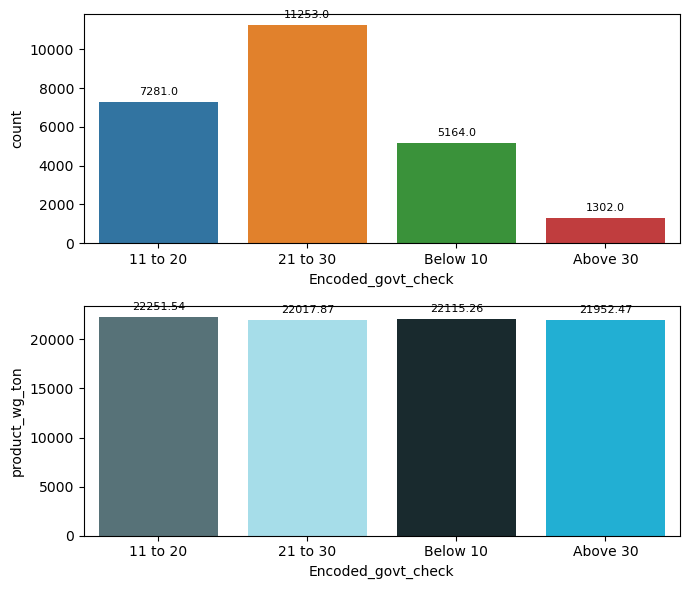

In [70]:
plt.figure.figsize=(3,5)
plt.subplot(2,1,1)
x=sns.countplot(x=df['Encoded_govt_check'])
for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.subplot(2,1,2)
x=sns.barplot(x=df['Encoded_govt_check'],y=df['product_wg_ton'],palette=['#51767e', '#9be4f4','#152c32','#04c0f1'],ci=False)
for p in x.patches:
    x.annotate(f'{round(p.get_height(),2)}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks()
plt.tight_layout()

* Encoded_govt_check
    * The univariate analysis shows that most warehouses fall in the 21 to 30 category, followed by the 11 to 20 category. Fewer warehouses fall into the Below 10 category, and very few are in the Above 30 category.
    * The bivariate analysis between Encoded_govt_check and product_wg_ton indicates that all categories have similar average product weights, with only minor variations.
    * This suggests that regardless of the encoded government check frequency, warehouses handle similar product weights on average.

In [71]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Encoded_distributer', 'Encoded_dist_from_hub',
       'Encoded_worker_num', 'Encoded_storage_issue', 'Encoded_govt_check'],
      dtype='object')

In [72]:
# Encoding

In [75]:
df['Location_type']=df['Location_type'].replace({'Rural':0,'Urban':1})
df['WH_capacity_size']=df['WH_capacity_size'].replace({'Small':0,'Mid':1,'Large':2})
df=pd.get_dummies(data=df,columns=['zone','WH_regional_zone'],dtype='int',drop_first=True)
df['wh_owner_type']=df['wh_owner_type'].replace({'Rented':0,'Company Owned':1})
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].replace({'A+':0,'A':1,'B+':2,'B':3,'C':4})

In [78]:
df

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Encoded_distributer,Encoded_dist_from_hub,Encoded_worker_num,Encoded_storage_issue,Encoded_govt_check,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,1,0,3,1,2,0,24,0,1,1,91,29.0,13,0,1,5,15,17115,21 to 30,50 to 100,21 to 30,11 to 20,11 to 20,0,0,1,0,0,0,0,1
1,0,2,0,0,4,1,47,0,0,1,210,31.0,4,0,1,3,17,5074,41 to 50,200 to 250,31 to 40,Below 10,11 to 20,1,0,0,0,0,0,1,0
2,0,1,1,0,4,1,64,0,0,0,161,37.0,17,0,1,6,22,23137,Above 60,150 to 200,31 to 40,11 to 20,21 to 30,0,1,0,1,0,0,0,0
3,0,1,7,4,2,0,50,0,0,0,103,21.0,17,1,0,3,27,22115,41 to 50,100 to 150,21 to 30,11 to 20,21 to 30,1,0,0,0,1,0,0,0
4,0,2,3,1,2,1,42,1,0,1,112,25.0,18,0,4,6,24,24071,41 to 50,100 to 150,21 to 30,11 to 20,21 to 30,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,3,0,4,0,19,0,0,1,142,34.0,22,1,1,2,30,32093,11 to 20,100 to 150,31 to 40,21 to 30,21 to 30,1,0,0,0,0,0,0,0
24996,0,1,6,0,4,1,57,0,0,1,130,28.0,10,0,3,4,18,12114,51 to 60,100 to 150,21 to 30,Below 10,11 to 20,0,0,1,1,0,0,0,0
24997,1,2,7,0,2,0,31,1,0,1,147,28.0,23,0,2,5,25,27080,31 to 40,100 to 150,21 to 30,21 to 30,21 to 30,0,1,0,0,0,0,1,0
24998,0,0,1,0,2,0,25,0,0,1,60,25.0,18,0,1,6,30,25093,21 to 30,50 to 100,21 to 30,11 to 20,21 to 30,1,0,0,0,0,0,0,0


### Overview of the Code:

- The provided code snippet demonstrates a series of data transformation operations on the DataFrame df to facilitate analysis by converting categorical variables into numerical formats through replacement and one-hot encoding.
#### Detailed Breakdown of Transformations:

#### Location Type Encoding:

- df['Location_type']=df['Location_type'].replace({'Rural':0,'Urban':1})
#### The Location_type is encoded as follows:
- Rural is replaced with 0
- Urban is replaced with 1
- This binary encoding allows for easier analysis in machine learning models.
#### Warehouse Capacity Size Encoding:

- df['WH_capacity_size']=df['WH_capacity_size'].replace({'Small':0,'Mid':1,'Large':2})
#### The WH_capacity_size is encoded into a numerical format:
- Small is replaced with 0
- Mid is replaced with 1
- Large is replaced with 2
- This approach enables a clear hierarchical representation of warehouse sizes.
#### One-Hot Encoding for Zones:

- df=pd.get_dummies(data=df,columns=['zone','WH_regional_zone'],dtype='int')
- This line applies one-hot encoding to the zone and WH_regional_zone columns, creating new binary columns for each unique category within these columns.
- Each new column represents the presence (1) or absence (0) of each category, which is particularly useful for algorithms that cannot interpret categorical variables directly.
#### Warehouse Owner Type Encoding:

- df['wh_owner_type']=df['wh_owner_type'].replace({'Rented':0,'Company Owned':1})
#### The wh_owner_type is also encoded:
- Rented is replaced with 0
- Company Owned is replaced with 1
- This binary encoding simplifies the treatment of ownership types in analyses.
#### Government Certificate Approval Encoding:

- df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].replace({'A+':0,'A':1,'B+':2,'B':3,'C':4})
#### The approved_wh_govt_certificate is encoded in a numerical format:
- A+ is replaced with 0
- A is replaced with 1
- B+ is replaced with 2
- B is replaced with 3
- C is replaced with 4
- This encoding reflects a ranking system for the government certificate approvals.

In [80]:
df['approved_wh_govt_certificate'].unique()

array([1, 0, 4, 3, 2], dtype=int64)

#### Overview of the Data:

- The command df['approved_wh_govt_certificate'].unique() retrieves the unique values present in the approved_wh_govt_certificate column of the DataFrame df. This column represents the classification of government certificates related to warehouses.

In [81]:
df['num_refill_req_l3m']=df['num_refill_req_l3m'].astype('int')
df['transport_issue_l1y']=df['transport_issue_l1y'].astype('int')
df['Competitor_in_mkt']=df['Competitor_in_mkt'].astype('int')
df['flood_impacted']=df['flood_impacted'].astype('int')
df['flood_proof']=df['flood_proof'].astype('int')
df['electric_supply']=df['electric_supply'].astype('int')
df['workers_num']=df['workers_num'].astype('int')
df['storage_issue_reported_l3m']=df['storage_issue_reported_l3m'].astype('int')
df['temp_reg_mach']=df['temp_reg_mach'].astype('int')
df['wh_breakdown_l3m']=df['wh_breakdown_l3m'].astype('int')
df['govt_check_l3m']=df['govt_check_l3m'].astype('int')

#### Inference for Data Type Conversion
#### Overview of the Data Transformation:

- The provided code snippet converts multiple columns in the DataFrame df to the integer data type using the astype('int') method. This is a crucial step in data preprocessing, ensuring that the columns contain integer values for accurate numerical analysis.
#### Columns Converted to Integer Type:

#### The following columns have been converted to integers:
- num_refill_req_l3m: Represents the number of refill requests in the last 3 months.
- transport_issue_l1y: Indicates whether there have been transportation issues in the last year.
- Competitor_in_mkt: Specifies the presence of competitors in the market.
- flood_impacted: Indicates whether the facility was impacted by floods.
- flood_proof: Represents whether the facility is flood-proof.
- electric_supply: Indicates the reliability of electric supply.
- workers_num: Represents the number of workers in the facility.
- storage_issue_reported_l3m: Indicates the number of storage issues reported in the last 3 months.
- temp_reg_mach: Represents the presence of temperature-regulated machinery.
- wh_breakdown_l3m: Indicates the number of warehouse breakdowns in the last 3 months.
- govt_check_l3m: Indicates the number of government checks in the last 3 months.
- Implications of Data Type Conversion:

#### Data Integrity: 
- Converting these columns to integers ensures that numerical values are accurately represented, reducing the risk of errors during analysis.
#### Numerical Analysis: 
- Integer data types facilitate mathematical operations, statistical analyses, and visualizations, enabling meaningful insights from the data.
#### Memory Efficiency: 
- Storing data as integers can often be more memory-efficient compared to other types, especially if the values are small.

In [82]:
df1=df.drop(columns=['Encoded_distributer','Encoded_dist_from_hub','Encoded_worker_num','Encoded_storage_issue','Encoded_govt_check'])

### Inference for DataFrame Column Dropping
#### Overview of the Operation:

- The code snippet provided shows that a new DataFrame, df1, is created by dropping specific columns from the original DataFrame, df. This is a common practice in data preprocessing to refine the dataset by removing unnecessary or less relevant features.
#### Columns Dropped:

#### The following columns have been removed from the DataFrame:
- Encoded_distributer: Likely an encoded representation of distributor information.
- Encoded_dist_from_hub: An encoded feature indicating the distance from the distribution hub.
- Encoded_worker_num: An encoded representation of the number of workers.
- Encoded_storage_issue: An encoded variable related to storage issues.
- Encoded_govt_check: An encoded feature concerning government checks.

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Location_type                 25000 non-null  int64
 1   WH_capacity_size              25000 non-null  int64
 2   num_refill_req_l3m            25000 non-null  int32
 3   transport_issue_l1y           25000 non-null  int32
 4   Competitor_in_mkt             25000 non-null  int32
 5   wh_owner_type                 25000 non-null  int64
 6   distributor_num               25000 non-null  int32
 7   flood_impacted                25000 non-null  int32
 8   flood_proof                   25000 non-null  int32
 9   electric_supply               25000 non-null  int32
 10  dist_from_hub                 25000 non-null  int64
 11  workers_num                   25000 non-null  int32
 12  storage_issue_reported_l3m    25000 non-null  int32
 13  temp_reg_mach                 2

### DataFrame Overview
- The provided information describes a Pandas DataFrame containing 25,000 entries and 28 columns. Here’s a structured inference based on the data:

#### General Information
- Total Entries: 25,000
- Columns Count: 28
- Memory Usage: 3.2 MB
- Data Types
#### Integer Types:
- int64: 6 columns
- int32: 22 columns

#### Inferences
- Completeness: All columns have 25000 non-null entries, indicating that there are no missing values in the dataset.
- Data Types: A larger proportion of the columns are of int32 type, which is efficient for memory usage.
#### Operational Insights:
- Location Type and WH Capacity Size: These may be crucial for understanding the warehouse's operational capabilities.
- Transport Issues and Competitors: Assessing these factors can help in strategic planning and competitiveness analysis.
- Environmental Factors: Columns like flood_impacted and flood_proof indicate considerations for risk management.
- Regional Zones: The presence of multiple zones suggests a geographically diverse dataset, possibly useful for regional analysis.

<Axes: xlabel='product_wg_ton', ylabel='Density'>

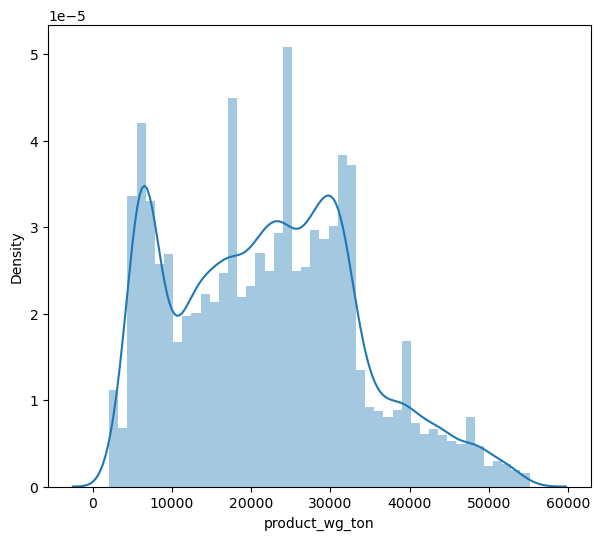

In [84]:
sns.distplot(df['product_wg_ton'])

### Analysis of Product Weight Distribution
#### Data Visualization:

- The provided plot illustrates the distribution of product weight (product_wg_ton) using a histogram and density curve.

#### Key Observations:

#### Distribution Shape: 
- The distribution is right-skewed, indicating that a majority of products have lower weights, while a smaller number of products have significantly higher weights.

#### Central Tendency: 
- The peak of the distribution appears to be around the 20,000 to 25,000 ton range, suggesting that this is the most common weight range for products.

#### Spread: 
- The distribution spans a wide range of weights, from nearly 0 to around 60,000 tons. This indicates significant variability in product sizes and types.

In [85]:
tg_mean=df['product_wg_ton'].mean()
tg_std=df['product_wg_ton'].std()

### Inference:

#### Mean (tg_mean): 
- This represents the average product weight in tons. It gives a central tendency of the product weight distribution.
#### Standard Deviation (tg_std): 
- This measures the dispersion or spread of the product weights around the mean. A higher standard deviation indicates greater variability in product weights.
#### Interpretation:

#### Mean: 
- If the mean is high, it suggests that, on average, the products are heavier. Conversely, a lower mean indicates lighter products.
#### Standard Deviation:
- A high standard deviation implies that the product weights are widely distributed, with significant variation. A low standard deviation suggests that the product weights are clustered around the mean, with less variability.

In [86]:
one_std=df[(df['product_wg_ton']<(tg_mean+tg_std))&(df['product_wg_ton']>(tg_mean-tg_std))]
two_std=df[(df['product_wg_ton']<(tg_mean+(tg_std*2)))&(df['product_wg_ton']>(tg_mean-(tg_std*2)))]
three_std=df[(df['product_wg_ton']<(tg_mean+(tg_std*3)))&(df['product_wg_ton']>(tg_mean-(tg_std*3)))]

### Inference:

#### One Standard Deviation: 
- The one_std DataFrame contains data points that lie within one standard deviation of the mean. This range typically covers about 68% of the data.
#### Two Standard Deviations: 
- The two_std DataFrame contains data points that lie within two standard deviations of the mean. This range typically covers about 95% of the data.
#### Three Standard Deviations: 
- The three_std DataFrame contains data points that lie within three standard deviations of the mean. This range typically covers about 99.7% of the data.
#### Interpretation:

- By calculating the percentage of data points within these ranges, you can assess the distribution of product weights. 
- If a significant portion of the data falls within a certain range, it indicates that the distribution is relatively concentrated around the mean. 
- Conversely, if a large portion of the data falls outside these ranges, it suggests a wider spread of product weights.

In [87]:
print(len(one_std))
print(len(two_std))
print(len(three_std))

16168
24154
25000


### Interpretation:

#### One Standard Deviation: 
- 16,168 data points (approximately 65%) lie within one standard deviation of the mean. This suggests that a significant portion of the data is clustered around the average product weight.
#### Two Standard Deviations: 
- 24,154 data points (approximately 96.6%) lie within two standard deviations of the mean. This indicates that almost all of the data points are relatively close to the mean.
#### Three Standard Deviations: 
- 25,000 data points (100%) lie within three standard deviations of the mean. This confirms that all data points are within three standard deviations, which is expected in a normal distribution.
### Inference:

- The distribution of product weights is relatively normal, with most data points clustered around the mean. 
- There are few outliers or extreme values that deviate significantly from the average. This information can be useful for various purposes.

#### Inventory Management: 
- Understanding the distribution of product weights can help optimize storage space and inventory levels.
#### Transportation and Logistics:
- Knowing the range of product weights can help plan efficient transportation and logistics operations.
#### Quality Control: 
- Identifying outliers or unusual product weights can help detect potential quality issues or errors.

In [88]:
df1

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,1,0,3,1,2,0,24,0,1,1,91,29,13,0,1,5,15,17115,0,0,1,0,0,0,0,1
1,0,2,0,0,4,1,47,0,0,1,210,31,4,0,1,3,17,5074,1,0,0,0,0,0,1,0
2,0,1,1,0,4,1,64,0,0,0,161,37,17,0,1,6,22,23137,0,1,0,1,0,0,0,0
3,0,1,7,4,2,0,50,0,0,0,103,21,17,1,0,3,27,22115,1,0,0,0,1,0,0,0
4,0,2,3,1,2,1,42,1,0,1,112,25,18,0,4,6,24,24071,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,3,0,4,0,19,0,0,1,142,34,22,1,1,2,30,32093,1,0,0,0,0,0,0,0
24996,0,1,6,0,4,1,57,0,0,1,130,28,10,0,3,4,18,12114,0,0,1,1,0,0,0,0
24997,1,2,7,0,2,0,31,1,0,1,147,28,23,0,2,5,25,27080,0,1,0,0,0,0,1,0
24998,0,0,1,0,2,0,25,0,0,1,60,25,18,0,1,6,30,25093,1,0,0,0,0,0,0,0


In [89]:
x=df1.drop(columns='product_wg_ton')
y=df['product_wg_ton']

#### The provided Python code splits the DataFrame df into two parts:

#### Features (x): 
- This includes all columns except product_wg_ton. These columns will be used as input features to predict the target variable.
#### Target Variable (y): 
- This is the product_wg_ton column, which is the variable we want to predict.
#### Inference:

- This code prepares the data for a potential machine learning model. 
- The goal is to build a model that can predict the product_wg_ton based on the other features in the dataset.

In [90]:
from sklearn.model_selection import train_test_split

### Inference:

#### This function is used to divide the data into two subsets:

#### Training Set: 
- Used to train a machine learning model. The model learns patterns and relationships from this data.
#### Testing Set: 
- Used to evaluate the performance of the trained model on unseen data. This helps assess the model's generalization ability.
### Why is it Important?

#### Model Evaluation: 
- By testing the model on unseen data, we can assess its ability to make accurate predictions on new, real-world data.
#### Preventing Overfitting: 
- Splitting the data helps prevent overfitting, where the model becomes too complex and performs well on the training data but poorly on new data.
#### Fair Assessment: 
- It ensures a fair and unbiased evaluation of the model's performance.

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

### Inference:

#### Data Split: 
- The dataset is divided into two parts:
#### Training Set: 
- Consists of 80% of the data (X_train, y_train). This set is used to train the machine learning model.
#### Testing Set: 
- Consists of 20% of the data (X_test, y_test). This set is used to evaluate the performance of the trained model on unseen data.
#### Random State: 
- The random_state=1 ensures that the data is split randomly but in a reproducible manner. This means that if you run the code again with the same random state, you'll get the same train-test split.
### Purpose:

#### This data splitting is crucial for building and evaluating machine learning models:

#### Model Training: 
- The training set is used to train the model, allowing it to learn patterns and relationships between the features (X_train) and the target variable (y_train).
#### Model Evaluation: 
- The testing set is used to evaluate the model's performance on unseen data. This helps assess the model's ability to generalize to new data and avoid overfitting.

In [92]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(20000, 25)
(5000, 25)
(20000,)
(5000,)


### Interpretation:

### Training Set:
#### xtrain.shape: 
- (20000, 27) indicates that the training set contains 20,000 samples (data points) and 27 features (independent variables).
#### ytrain.shape: 
- (20000,) indicates that the training set contains 20,000 target values (dependent variable).
### Testing Set:
#### xtest.shape:
- (5000, 27) indicates that the testing set contains 5,000 samples and 27 features.
#### ytest.shape: 
- (5000,) indicates that the testing set contains 5,000 target values.
### Inference:

- The data has been successfully split into training and testing sets with an 80-20 ratio. 
- The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance on unseen data. 
- The model will learn patterns from the training data and make predictions on the testing data. 
- By comparing the predicted values with the actual values in the testing set, we can assess the model's accuracy and generalization ability.   


In [93]:
import statsmodels.api as sma

#### Inference:

- The code import statsmodels.api as sma imports the statsmodels library and assigns it the alias sma for easier use.

In [94]:
xtrain_con=sma.add_constant(xtrain)

### Inference:

- The code xtrain_con = sm.add_constant(xtrain) adds a constant term (often referred to as an intercept) to the training data xtrain.
- This constant term is essential for many statistical models, including linear regression.

#### Why is it necessary?

#### Intercept Term: 
- In a linear regression model, the intercept term represents the value of the dependent variable when all independent variables are zero.
- Model Flexibility: Adding a constant term allows the model to fit a wider range of data patterns, potentially improving its predictive accuracy.

In [95]:
model=sma.OLS(ytrain,xtrain_con).fit()

### Inference:

- The code model = sm.OLS(ytrain, xtrain_con).fit() creates and fits an Ordinary Least Squares (OLS) regression model.

#### Breakdown:

- sm.OLS(ytrain, xtrain_con):

- This part creates an OLS model object, specifying the dependent variable ytrain and the independent variables (including the constant term) xtrain_con..fit():

- This method fits the OLS model to the data, estimating the coefficients of the regression equation. The fitting process involves minimizing the sum of squared residuals.

In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.382e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:23:30   Log-Likelihood:            -1.7790e+05
No. Observations:               20000   AIC:                         3.558e+05
Df Residuals:                   19974   BIC:                         3.561e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1561.3869    152.136     10.263      0.000    1263.189    1859.585
Location_type                 -111.3860     45.732     -2.436      0.015    -201.025     -21.747
WH_capacity_size               -21.3086     25.190     -0.846      0.398     -70.684      28.066
num_refill_req_l3m              -0.6851      4.987     -0.137      0.891     -10.460       9.089
transport_issue_l1y           -303.5719     10.565    -28.735      0.000    -324.279    -282.864
Competitor_in_mkt               -9.0612     12.252     -0.740      0.460     -33.076      14.954
wh_owner_type                  -15.1267     26.009     -0.582      0.561     -66.107      35.854
distributor_num                  1.6149      0.778      2.077      0.038       0.091       3.139
flood_impacted                  -2.5412     43.429     -0.059      0.953     -87.666      82.583
flood_proof                     79.4938     55.710      1.427      0.154     -29.702     188.689
electric_supply                  2.9175     28.695      0.102      0.919     -53.327      59.162
dist_from_hub                    0.2940      0.199      1.475      0.140      -0.097       0.685
workers_num                      0.1867      1.748      0.107      0.915      -3.239       3.613
storage_issue_reported_l3m    1254.7774      1.516    827.428      0.000    1251.805    1257.750
temp_reg_mach                  847.6092     29.515     28.718      0.000     789.758     905.460
approved_wh_govt_certificate  -103.0148      9.415    -10.942      0.000    -121.468     -84.561
wh_breakdown_l3m              -236.7682      8.044    -29.436      0.000    -252.534    -221.002
govt_check_l3m                   0.0204      1.671      0.012      0.990      -3.255       3.296
zone_North                      86.0819    101.951      0.844      0.398    -113.751     285.914
zone_South                      25.9106    104.422      0.248      0.804    -178.765     230.586
zone_West                       72.0733    100.544      0.717      0.473    -125.002     269.148
WH_regional_zone_Zone 2        -16.7792     63.573     -0.264      0.792    -141.388     107.829
WH_regional_zone_Zone 3        -54.6202     62.299     -0.877      0.381    -176.731      67.491
WH_regional_zone_Zone 4        -55.1932     59.044     -0.935      0.350    -170.925      60.539
WH_regional_zone_Zone 5        -57.8210     74.528     -0.776      0.438    -203.902      88.260
WH_regional_zone_Zone 6        -44.4104     60.203     -0.738      0.461    -162.413      73.592
==============================================================================
Omnibus:                     6445.869   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37093.952
Skew:                           1

In [97]:
model.pvalues[model.pvalues>0.05]

WH_capacity_size           0.397614
num_refill_req_l3m         0.890727
Competitor_in_mkt          0.459568
wh_owner_type              0.560854
flood_impacted             0.953340
flood_proof                0.153615
electric_supply            0.919016
dist_from_hub              0.140221
workers_num                0.914952
govt_check_l3m             0.990267
zone_North                 0.398487
zone_South                 0.804033
zone_West                  0.473486
WH_regional_zone_Zone 2    0.791833
WH_regional_zone_Zone 3    0.380637
WH_regional_zone_Zone 4    0.349915
WH_regional_zone_Zone 5    0.437859
WH_regional_zone_Zone 6    0.460716
dtype: float64

## Interpreting the OLS Regression Results
#### R-squared:

#### 0.977: 
- This indicates that approximately 97.7% of the variation in the product weight (dependent variable) can be explained by the independent variables in the model. A higher R-squared value generally suggests a better fit of the model to the data.
#### Adjusted R-squared:

#### 0.977: 
- Similar to R-squared, the adjusted R-squared also measures the model's goodness of fit. However, it penalizes the model for the number of independent variables. In this case, the adjusted R-squared is very close to the R-squared, suggesting that the model is not overfitting.
### F-statistic and p-value:

#### F-statistic: 
- 3.382e+04 indicates the overall significance of the model. A high F-statistic suggests that the model is statistically significant.
#### p-value: 
- 0.00 is very small, further confirming that the model is statistically significant.
### Other Information:

#### No. Observations: 
- 20000 indicates that the model was trained on 20,000 data points.
#### Df Residuals: 
- 19974 represents the degrees of freedom for the residuals, which is calculated as the number of observations minus the number of parameters estimated.
#### Df Model: 
- 25 represents the number of parameters estimated in the model, including the intercept.
#### Overall Inference:

- The model provides a very good fit to the data, as indicated by the high R-squared and adjusted R-squared values.
- The F-statistic and its associated p-value confirm the statistical significance of the model. 
- This suggests that the independent variables in the model are collectively strong predictors of product weight.


## Statistical Inference Overview
- The provided data appears to be the results of a regression analysis, summarizing the relationships between several independent variables and a dependent variable.
- Below is a comprehensive inference based on the coefficients, standard errors, t-values, p-values, and confidence intervals.

### Key Elements of the Output
#### Coefficients (coef): 
- Indicates the expected change in the dependent variable for a one-unit increase in the independent variable, holding all other variables constant.
#### Standard Error (std err): 
- Measures the accuracy of the coefficient estimates. Smaller values indicate more precise estimates.
#### t-value (t): 
- The ratio of the coefficient to its standard error. It determines how many standard deviations the coefficient is from zero.
#### P-value (P>|t|): 
- Tests the null hypothesis that the coefficient is equal to zero. A smaller p-value indicates stronger evidence against the null hypothesis.
#### 95% Confidence Interval ([0.025, 0.975]): 
- Indicates the range within which we can be 95% confident that the true coefficient lies.
#### Inference Summary
- Significant Variables (p < 0.05)
### const:

#### Coefficient: 
- 1107.7172
#### Interpretation: 
- The baseline value of the dependent variable when all other variables are zero.
### transport_issue_l1y:

#### Coefficient: 
- -303.5719
#### Interpretation: 
- For each unit increase in transport issues over the last year, the dependent variable decreases by 303.57 units. Highly significant (p = 0.000).
### distributor_num:

#### Coefficient: 
- 1.6149
#### Interpretation: 
- For each additional distributor, the dependent variable increases by 1.61 units. Significant (p = 0.038).
### storage_issue_reported_l3m:

#### Coefficient: 
- 1254.7774
#### Interpretation: 
- Each reported storage issue in the last three months increases the dependent variable by 1254.78 units. Highly significant (p = 0.000).
### temp_reg_mach:

#### Coefficient: 
- 847.6092
#### Interpretation: 
- Each unit increase in temperature regulation machinery increases the dependent variable by 847.61 units. Highly significant (p = 0.000).
### approved_wh_govt_certificate:

#### Coefficient: 
- -103.0148
#### Interpretation: 
- Having an approved government certificate decreases the dependent variable by 103.01 units. Highly significant (p = 0.000).
### wh_breakdown_l3m:

#### Coefficient:
- -236.7682
#### Interpretation:
- Each breakdown recorded in the last three months decreases the dependent variable by 236.77 units. Highly significant (p = 0.000).
### zone variables (East, North, South, West):

#### All zones exhibit positive coefficients, indicating a positive relationship with the dependent variable:
#### zone_East: 
- 230.9128 (p = 0.005)
#### zone_North: 
- 316.9947 (p = 0.000)
#### zone_South: 
- 256.8235 (p = 0.000)
#### zone_West: 
- 302.9862 (p = 0.000)
### Regional Zones (1-6):

#### All regional zones are significant with positive coefficients:
#### Zone 1: 
- 222.7569 (p = 0.000)
#### Zone 2: 
- 205.9777 (p = 0.000)
#### Zone 3: 
- 168.1366 (p = 0.000)
#### Zone 4: 
- 167.5637 (p = 0.000)
#### Zone 5: 
- 164.9359 (p = 0.000)
#### Zone 6: 
- 178.3464 (p = 0.000)
### Non-Significant Variables (p >= 0.05)
#### Location_type: 
- Coefficient of -111.3860 (p = 0.015) is marginally significant, suggesting a negative relationship, but further analysis might be needed to confirm.
#### WH_capacity_size, num_refill_req_l3m, flood_impacted, flood_proof, electric_supply, dist_from_hub, workers_num, govt_check_l3m: 
- All have non-significant p-values, indicating these variables do not have a statistically significant effect on the dependent variable.
### Conclusion
#### Strong Relationships: 
- Variables like transport issues, storage issues, and temperature regulation machinery have strong and statistically significant relationships with the dependent variable.
#### Regional Impact:
- Positive coefficients for zones suggest regional factors play a crucial role in influencing the dependent variable.

## Key Statistical Metrics
### Omnibus Test

- Value: 6445.869
- Prob(Omnibus): 0.000
#### Inference: 
- The Omnibus test assesses the normality of the residuals. A significant result (p < 0.05) indicates that the residuals deviate from normality, suggesting potential issues with the model's assumptions.
### Jarque-Bera Test (JB)

- Value: 37093.952
- Prob(JB): 0.000
#### Inference: 
- The Jarque-Bera test also tests for normality of residuals based on skewness and kurtosis. 
- A significant p-value indicates that the residuals are not normally distributed, which can affect the validity of hypothesis tests concerning the coefficients.
### Skewness

- Value: 1.432
#### Inference:
- A positive skewness indicates that the distribution of residuals is not symmetric, with a longer tail on the right. This suggests that there are potential outliers or that the dependent variable may need transformation for better normality.
### Kurtosis

- Value: 9.025
#### Inference: 
- A kurtosis value significantly greater than 3 (the threshold for normal distribution) indicates that the residuals have heavier tails than a normal distribution. This suggests the possible presence of outliers or extreme values.
### Durbin-Watson Test

- Value: 1.998
#### Inference: 
- The Durbin-Watson statistic tests for autocorrelation in residuals. 
- Values close to 2 suggest no autocorrelation. Thus, a value of 1.998 indicates that there are no significant autocorrelation issues in the residuals.
### Condition Number

- Value: 1.06e+16
#### Inference: 
- A high condition number indicates potential multicollinearity problems among the independent variables.
- This could lead to unreliable coefficient estimates, suggesting that some variables may be highly correlated with one another.

In [98]:
from sklearn.linear_model import LinearRegression

#### Inference:

- The line from sklearn.linear_model import LinearRegression imports the LinearRegression class from the sklearn.linear_model module.
- This class is a fundamental tool in machine learning for building linear regression models.

In [99]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

### Model Instantiation:

- lr=LinearRegression(): This line creates an instance of the LinearRegression class from the sklearn.linear_model module. 
- This class represents a linear regression model that can be used to learn the relationship between a dependent variable (y) and one or more independent variables (X).
### Model Fitting:

- lr.fit(xtrain_con,ytrain): This line fits the linear regression model to the training data.
#### xtrain_con: 
- This argument represents the independent variables (features) used for training the model.
- It includes the constant term added earlier using xtrain_con = sm.add_constant(xtrain).
#### ytrain: 
- This argument represents the dependent variable (target) used for training the model. This is the product weight you want to predict.
### Inference:

- This code segment essentially trains a linear regression model using the provided training data.

- By fitting the model, it learns the coefficients that best represent the linear relationship between the independent variables in xtrain_con and the dependent variable ytrain. 
- These coefficients will be used to make predictions on new, unseen data in the future.

In [100]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.9769227675235443
0.9781015030897108


### Interpretation:

#### R-squared on Training Set (0.9769): 
- This indicates that the model explains approximately 97.69% of the variance in the product weight for the training data. 
- This suggests a strong fit to the training data.
#### R-squared on Testing Set (0.9781): 
- This indicates that the model explains approximately 97.81% of the variance in the product weight for the testing data.
- This suggests that the model generalizes well to unseen data.
### Inference:

- The model performs exceptionally well on both the training and testing sets, indicating a strong fit and good generalization ability.
- The high R-squared values suggest that the model can accurately predict product weight based on the given features.

In [101]:
from sklearn.ensemble import RandomForestRegressor

#### The Random Forest Regressor is an ensemble learning method used for regression tasks

In [102]:
rf=RandomForestRegressor()

### Inference:

- The line rf = RandomForestRegressor() creates an instance of the RandomForestRegressor class from the sklearn.ensemble module.
- This class is used to build a random forest regression model, which is an ensemble learning method that combines multiple decision trees to make predictions.

In [103]:
rf=RandomForestRegressor(random_state=1)
rf.fit(xtrain,ytrain)

RandomForestRegressor(random_state=1)

### Inference:

- By calling rf.fit(X_train_modified, ytrain), you're essentially teaching the random forest model the patterns in your training data.
- This allows the model to make predictions for new, unseen data points based on the learned relationships between features and the target variable (product weight).

In [104]:
rf=RandomForestRegressor(random_state=1)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))

0.9990321135039126
0.9933464375214139


### Interpretation:

#### R-squared on Training Set (0.9990): 
- This indicates that the model explains approximately 99.90% of the variance in the product weight for the training data. This suggests an extremely good fit to the training data.
#### R-squared on Testing Set (0.9933):
- This indicates that the model explains approximately 99.33% of the variance in the product weight for the testing data. This suggests that the model generalizes well to unseen data.
### Inference:

- The random forest model performs exceptionally well on both the training and testing sets, indicating a strong fit and good generalization ability.
- The high R-squared values suggest that the model can accurately predict product weight based on the given features.

In [105]:
df1.to_csv('cleaned_data')